<a href="https://colab.research.google.com/github/Userhost/projects/blob/main/Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Описание датасета

Датасет содержит информацию о данные о продажах эквадорского продуктового ритейлера Corporación Favorita, а также некоторую другую информацию.


https://www.kaggle.com/competitions/store-sales-time-series-forecasting/overview



In [ ]:
# Необходимые библиотеки

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [ ]:
!gdown 1Nk2PPRrwdY8v2K4dGmzQgT64ZbablnOE

Downloading...
From (original): https://drive.google.com/uc?id=1Nk2PPRrwdY8v2K4dGmzQgT64ZbablnOE
From (redirected): https://drive.google.com/uc?id=1Nk2PPRrwdY8v2K4dGmzQgT64ZbablnOE&confirm=t&uuid=415222b7-0817-4616-ba14-64f1f58b0337
To: /content/assign12_train.csv
100% 122M/122M [00:03<00:00, 32.6MB/s]


In [ ]:
!gdown 1ERHHVMBt4IjN34Z6luK09VagZQJV30wl

Downloading...
From (original): https://drive.google.com/uc?id=1ERHHVMBt4IjN34Z6luK09VagZQJV30wl
From (redirected): https://drive.google.com/uc?id=1ERHHVMBt4IjN34Z6luK09VagZQJV30wl&confirm=t&uuid=55eb3e9f-1953-45bb-ae91-d74694638fcf
To: /content/train.csv
100% 122M/122M [00:03<00:00, 35.3MB/s]


In [ ]:


store_sales = pd.read_csv(
    'assign12_train.csv',
    # dtype=dtype,
    parse_dates=['date'],
    infer_datetime_format=True,
)
store_sales = store_sales.set_index('date').to_period('D')
store_sales = store_sales.set_index(['store_nbr', 'family'], append=True)
average_sales = store_sales.groupby('date').mean()['sales']

<ipython-input-3-eb92831f12a0>:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  store_sales = pd.read_csv(


In [ ]:
store_sales

id     sales  \
date       store_nbr family                                          
2013-01-01 1         AUTOMOTIVE                        0     0.000   
                     BABY CARE                         1     0.000   
                     BEAUTY                            2     0.000   
                     BEVERAGES                         3     0.000   
                     BOOKS                             4     0.000   
...                                                  ...       ...   
2017-08-15 9         POULTRY                     3000883   438.133   
                     PREPARED FOODS              3000884   154.553   
                     PRODUCE                     3000885  2419.729   
                     SCHOOL AND OFFICE SUPPLIES  3000886   121.000   
                     SEAFOOD                     3000887    16.000   

                                                 onpromotion  
date       store_nbr family                                   
2013-01-01 1         AUTOMOTIVE                            0  
                     BABY CARE                             0  
                     BEAUTY                                0  
                     BEVERAGES                             0  
                     BOOKS                                 0  
...                                                      ...  
2017-08-15 9         POULTRY                               0  
                     PREPARED FOODS                        1  
                     PRODUCE                             148  
                     SCHOOL AND OFFICE SUPPLIES            8  
                     SEAFOOD                               0  

[3000888 rows x 3 columns]

In [ ]:
# Set Matplotlib defaults
plt.style.use('classic')
plt.rc("figure", autolayout=True, figsize=(11, 5))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)

In [ ]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

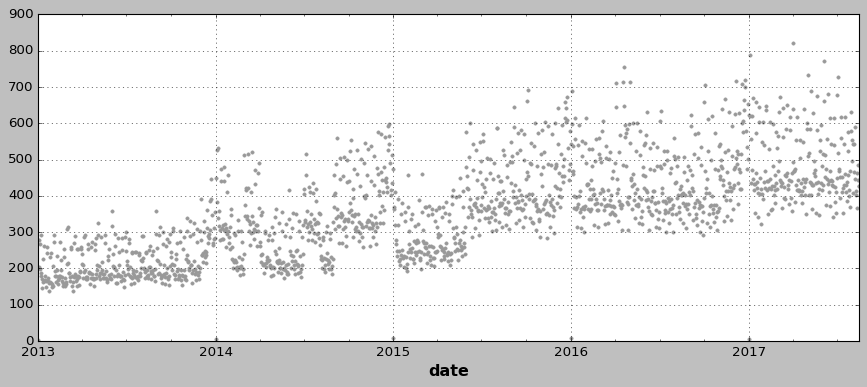

In [ ]:
ax = average_sales.plot(style=".", color="0.6")
ax.grid()
plt.show()

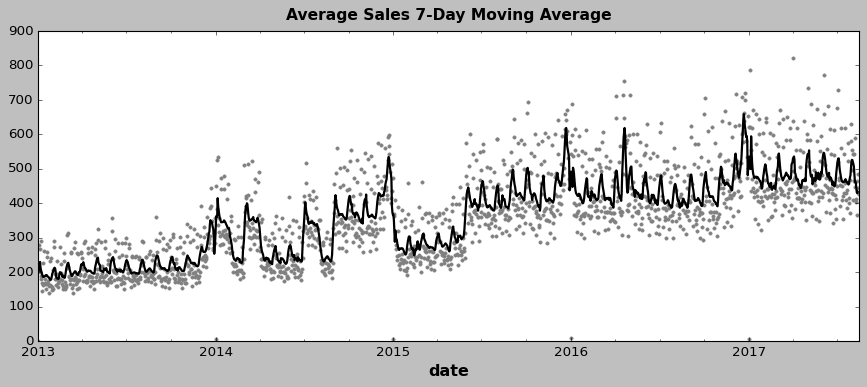

In [ ]:
moving_average = average_sales.rolling(
    window=7,
    center=True
).mean()

ax = average_sales.plot(style=".", color="0.5")
ax.grid()
moving_average.plot(
    ax=ax, linewidth=2, title="Average Sales 7-Day Moving Average", legend=False, color='black'
);

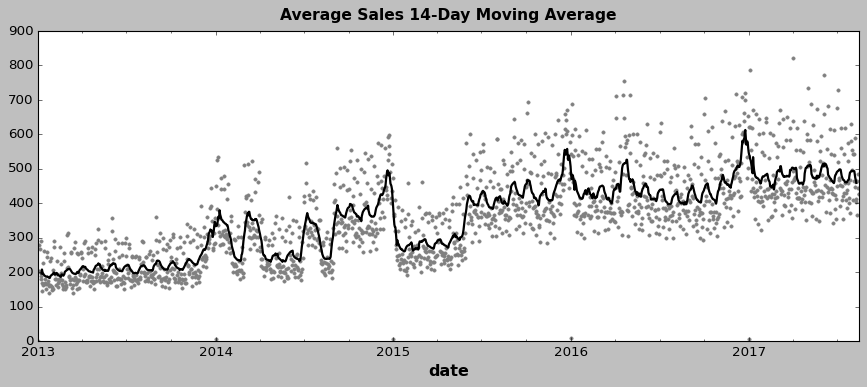

In [ ]:
moving_average = average_sales.rolling(
    window=14,
    center=True
).mean()

ax = average_sales.plot(style=".", color="0.5")
ax.grid()
moving_average.plot(
    ax=ax, linewidth=2, title="Average Sales 14-Day Moving Average", legend=False, color='black'
);

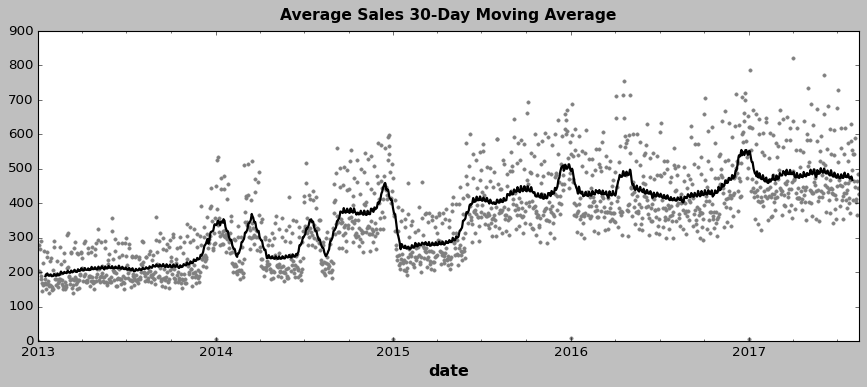

In [ ]:
moving_average = average_sales.rolling(
    window=30,
    center=True
).mean()

ax = average_sales.plot(style=".", color="0.5")
ax.grid()
moving_average.plot(
    ax=ax, linewidth=2, title="Average Sales 30-Day Moving Average", legend=False, color='black'
);

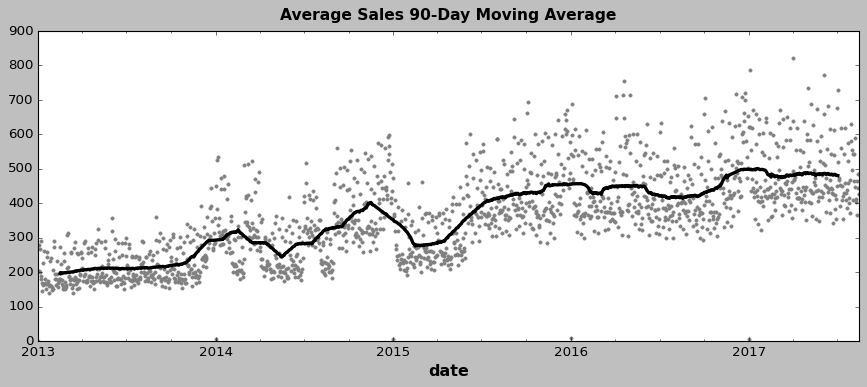

In [ ]:
moving_average = average_sales.rolling(
    window=90,
    center=True
).mean()

ax = average_sales.plot(style=".", color="0.5")
ax.grid()
moving_average.plot(
    ax=ax, linewidth=3, title="Average Sales 90-Day Moving Average", legend=False, color='black'
);

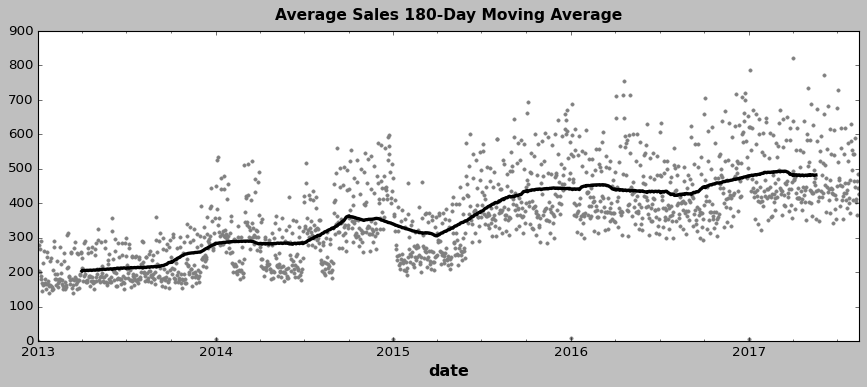

In [ ]:
moving_average = average_sales.rolling(
    window=180,
    center=True
).mean()

ax = average_sales.plot(style=".", color="0.5")
ax.grid()
moving_average.plot(
    ax=ax, linewidth=3, title="Average Sales 180-Day Moving Average", legend=False, color='black'
);

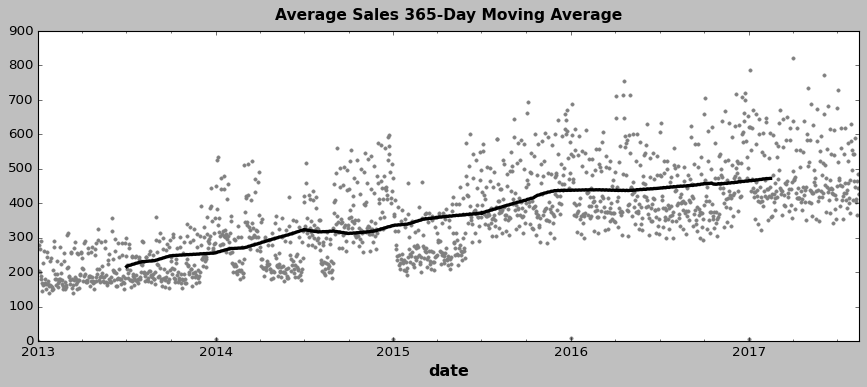

In [ ]:
moving_average = average_sales.rolling(
    window=365,
    center=True
).mean()

ax = average_sales.plot(style=".", color="0.5")
ax.grid()
moving_average.plot(
    ax=ax, linewidth=3, title="Average Sales 365-Day Moving Average", legend=False, color='black'
);

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
X = np.array(range(0, len(average_sales)))
X = X.reshape(-1, 1)

In [ ]:
model = LinearRegression()
model.fit(X, average_sales)

LinearRegression()

In [ ]:
y_pred = pd.Series(model.predict(X), index=average_sales.index)

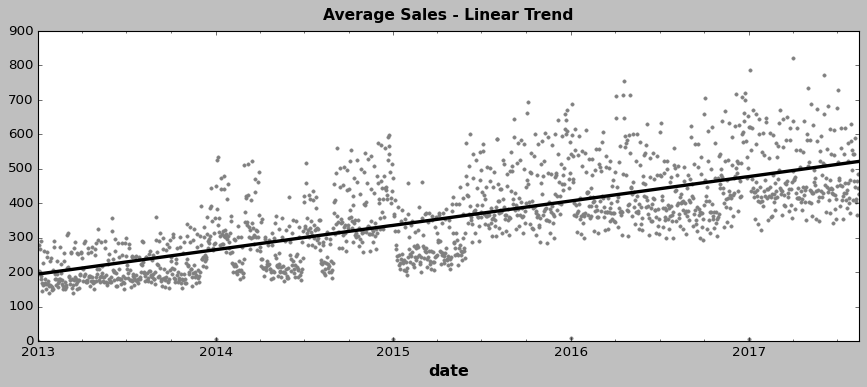

In [ ]:
ax = average_sales.plot(style=".", color="0.5", title="Average Sales - Linear Trend")
_ = y_pred.plot(ax=ax, linewidth=3, label="Trend", color = 'black')

In [ ]:
index_fore = pd.period_range(start=average_sales.index.max(), periods=30, freq='D')
X_fore = np.arange(len(average_sales), len(average_sales) + 30).reshape(-1, 1)
y_fore = pd.Series(model.predict(X_fore), index=index_fore)

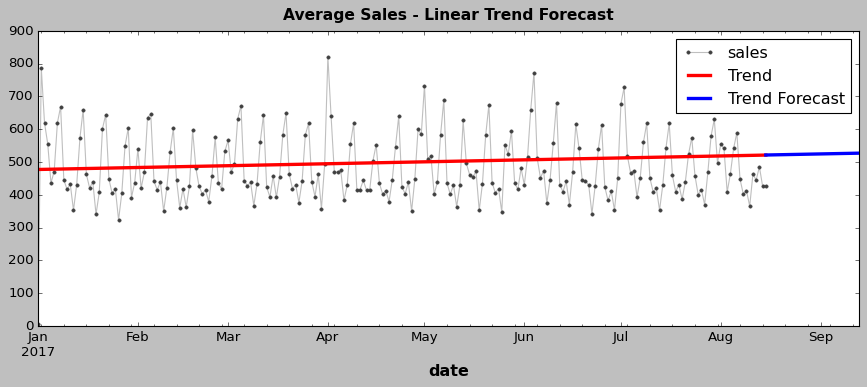

In [ ]:
ax = average_sales['2017-01':].plot(title="Average Sales - Linear Trend Forecast", **plot_params)
ax = y_pred['2017-01':].plot(ax=ax, linewidth=3, label="Trend", color='red')
ax = y_fore.plot(ax=ax, linewidth=3, label="Trend Forecast", color="blue")
_ = ax.legend()

In [ ]:
n = len(average_sales)
X = np.arange(0, n).reshape(-1, 1)
y = average_sales.copy()

period_test = 60
X_train = X[:-period_test]
y_train = y[:-period_test]

X_test = X[-period_test:]
y_test = y[-period_test:]

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = pd.Series(model.predict(X), index=average_sales.index)

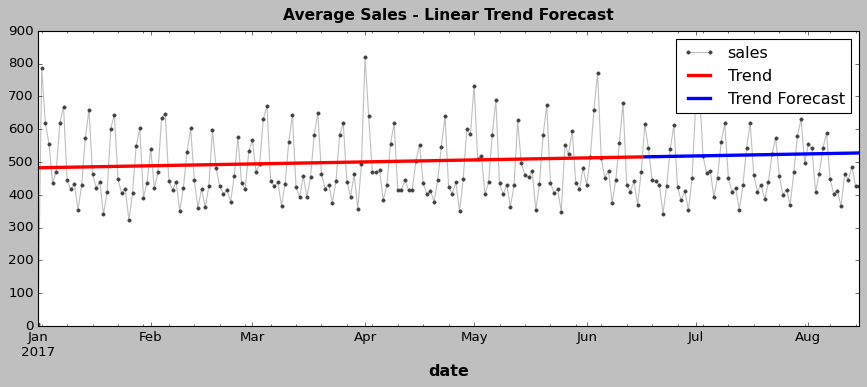

In [ ]:
ax = y['2017-01':].plot(title="Average Sales - Linear Trend Forecast", **plot_params)
ax = y_pred['2017-01':][:-period_test].plot(ax=ax, linewidth=3, label="Trend", color='red')
ax = y_pred[-period_test:].plot(ax=ax, linewidth=3, label="Trend Forecast", color="blue")
_ = ax.legend()

In [ ]:
n = len(average_sales)
X = np.arange(0, n).reshape(-1, 1)
y = average_sales.copy()

period_test = 30
X_train = X[:-period_test]
y_train = y[:-period_test]

X_test = X[-period_test:]
y_test = y[-period_test:]

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = pd.Series(model.predict(X), index=average_sales.index)

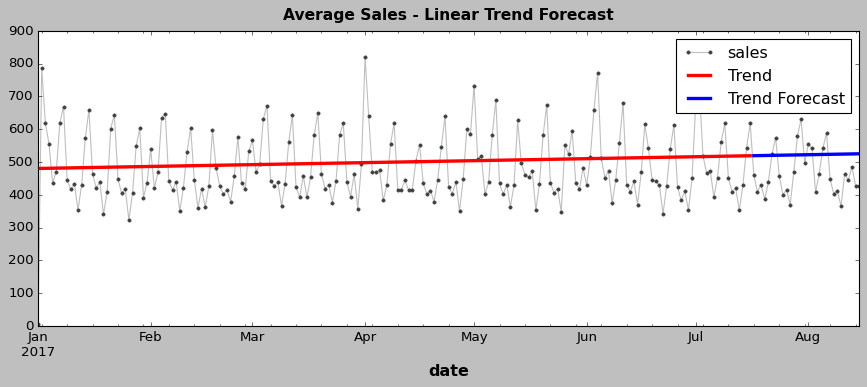

In [ ]:
ax = y['2017-01':].plot(title="Average Sales - Linear Trend Forecast", **plot_params)
ax = y_pred['2017-01':][:-period_test].plot(ax=ax, linewidth=3, label="Trend", color='red')
ax = y_pred[-period_test:].plot(ax=ax, linewidth=3, label="Trend Forecast", color="blue")
_ = ax.legend()

In [ ]:
from pathlib import Path
from warnings import simplefilter

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

In [ ]:
simplefilter("ignore")

In [ ]:
plt.style.use("classic")
plt.rc("figure", autolayout=True, figsize=(11, 5))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'


def seasonal_plot(X, y, period, freq, ax=None):
    if ax is None:
        _, ax = plt.subplots()
    palette = sns.color_palette("husl", n_colors=X[period].nunique(),)
    ax = sns.lineplot(
        x=freq,
        y=y,
        hue=period,
        data=X,
        ci=False,
        ax=ax,
        palette=palette,
        legend=False,
    )
    ax.set_title(f"Seasonal Plot ({period}/{freq})")
    for line, name in zip(ax.lines, X[period].unique()):
        y_ = line.get_ydata()[-1]
        ax.annotate(
            name,
            xy=(1, y_),
            xytext=(6, 0),
            color=line.get_color(),
            xycoords=ax.get_yaxis_transform(),
            textcoords="offset points",
            size=14,
            va="center",
        )
    return ax


def plot_periodogram(ts, detrend='linear', ax=None):
    from scipy.signal import periodogram
    fs = pd.Timedelta("365D") / pd.Timedelta("1D")
    freqencies, spectrum = periodogram(
        ts,
        fs=fs,
        detrend=detrend,
        window="boxcar",
        scaling='spectrum',
    )
    if ax is None:
        _, ax = plt.subplots()
    ax.step(freqencies, spectrum, color="purple")
    ax.set_xscale("log")
    ax.set_xticks([1, 2, 4, 6, 12, 26, 52, 104])
    ax.set_xticklabels(
        [
            "Annual (1)",
            "Semiannual (2)",
            "Quarterly (4)",
            "Bimonthly (6)",
            "Monthly (12)",
            "Biweekly (26)",
            "Weekly (52)",
            "Semiweekly (104)",
        ],
        rotation=30,
    )
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    ax.set_ylabel("Variance")
    ax.set_title("Periodogram")
    return ax


In [ ]:
tunnel = pd.read_csv("assign12_train.csv", parse_dates=["date"])
tunnel = tunnel.set_index("date").to_period("D")

In [ ]:
tunnel

id  store_nbr                      family     sales  \
date                                                                   
2013-01-01        0          1                  AUTOMOTIVE     0.000   
2013-01-01        1          1                   BABY CARE     0.000   
2013-01-01        2          1                      BEAUTY     0.000   
2013-01-01        3          1                   BEVERAGES     0.000   
2013-01-01        4          1                       BOOKS     0.000   
...             ...        ...                         ...       ...   
2017-08-15  3000883          9                     POULTRY   438.133   
2017-08-15  3000884          9              PREPARED FOODS   154.553   
2017-08-15  3000885          9                     PRODUCE  2419.729   
2017-08-15  3000886          9  SCHOOL AND OFFICE SUPPLIES   121.000   
2017-08-15  3000887          9                     SEAFOOD    16.000   

            onpromotion  
date                     
2013-01-01            0  
2013-01-01            0  
2013-01-01            0  
2013-01-01            0  
2013-01-01            0  
...                 ...  
2017-08-15            0  
2017-08-15            1  
2017-08-15          148  
2017-08-15            8  
2017-08-15            0  

[3000888 rows x 5 columns]

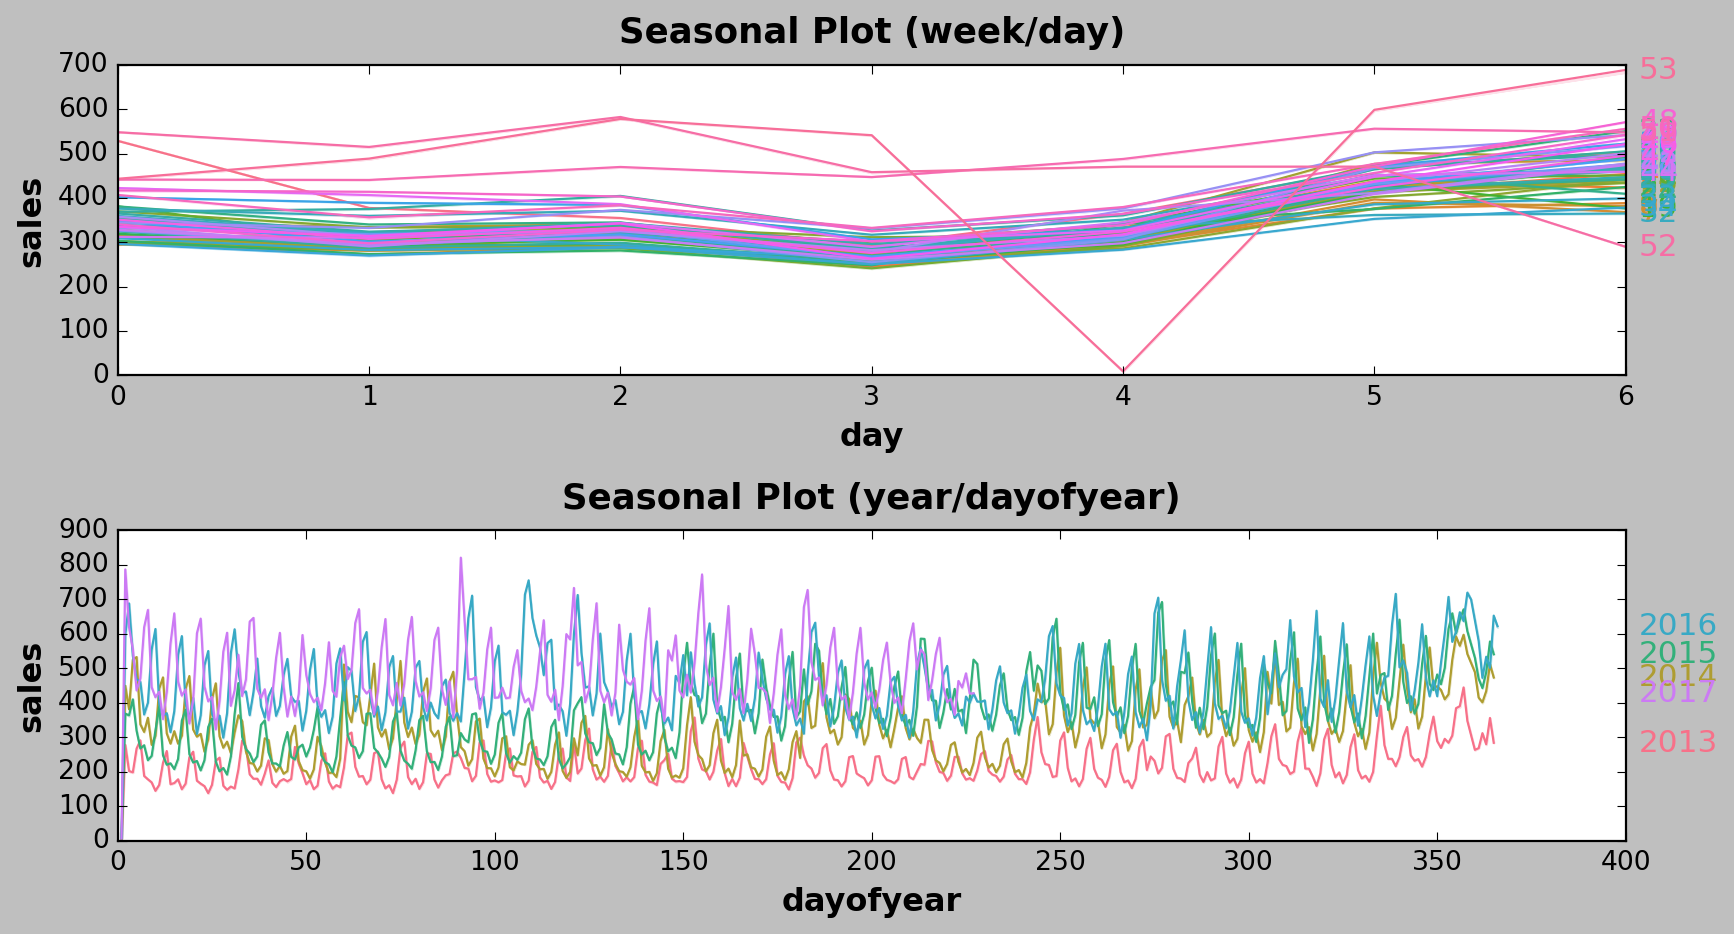

In [ ]:
X = tunnel.copy()

# days within a week
X["day"] = X.index.dayofweek  # the x-axis (freq)
X["week"] = X.index.week  # the seasonal period (period)

# days within a year
X["dayofyear"] = X.index.dayofyear
X["year"] = X.index.year
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(11, 6))
seasonal_plot(X, y="sales", period="week", freq="day", ax=ax0)
seasonal_plot(X, y="sales", period="year", freq="dayofyear", ax=ax1);

In [ ]:
X["month"] = X.index.month

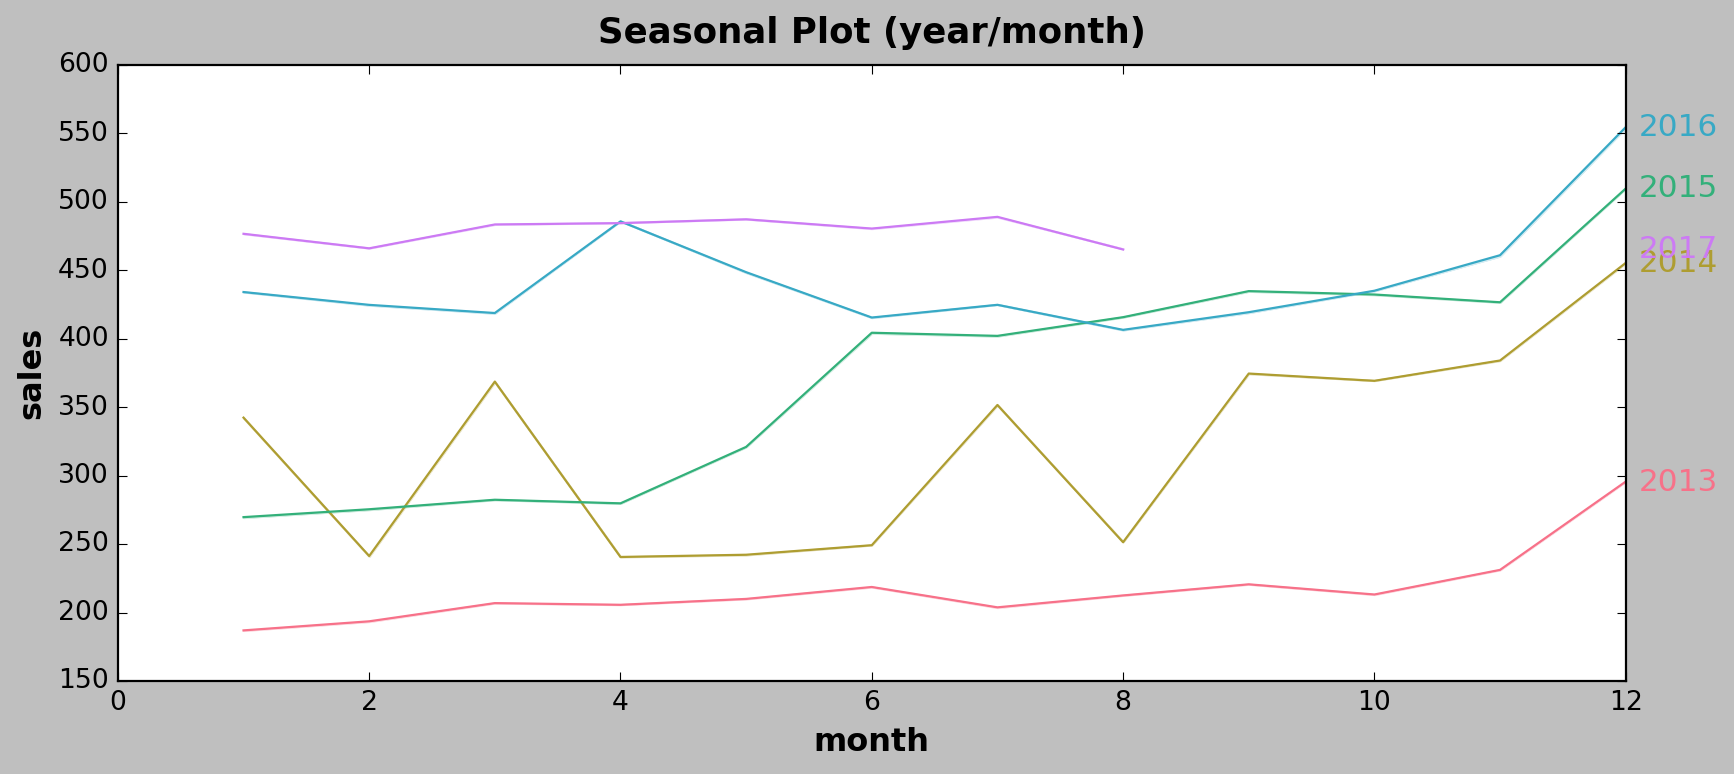

In [ ]:
ax = seasonal_plot(X, y="sales", period="year", freq="month");
plt.show()


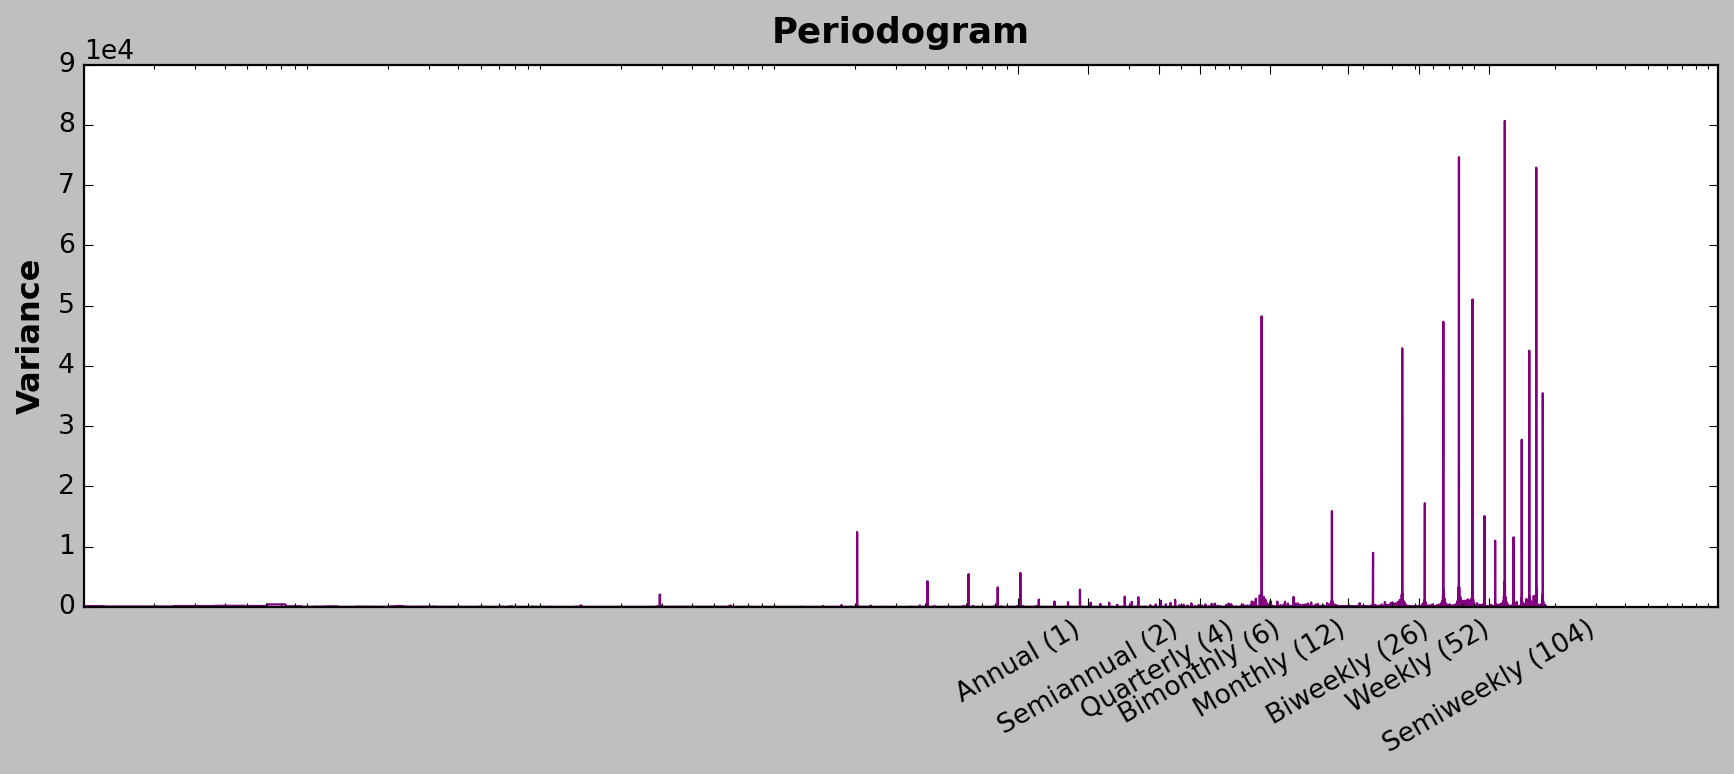

In [ ]:
plot_periodogram(tunnel.sales);

In [ ]:
pip install Prophet


In [ ]:
from prophet import Prophet

In [ ]:
tunnel

id  store_nbr                      family     sales  \
date                                                                   
2013-01-01        0          1                  AUTOMOTIVE     0.000   
2013-01-01        1          1                   BABY CARE     0.000   
2013-01-01        2          1                      BEAUTY     0.000   
2013-01-01        3          1                   BEVERAGES     0.000   
2013-01-01        4          1                       BOOKS     0.000   
...             ...        ...                         ...       ...   
2017-08-15  3000883          9                     POULTRY   438.133   
2017-08-15  3000884          9              PREPARED FOODS   154.553   
2017-08-15  3000885          9                     PRODUCE  2419.729   
2017-08-15  3000886          9  SCHOOL AND OFFICE SUPPLIES   121.000   
2017-08-15  3000887          9                     SEAFOOD    16.000   

            onpromotion  
date                     
2013-01-01            0  
2013-01-01            0  
2013-01-01            0  
2013-01-01            0  
2013-01-01            0  
...                 ...  
2017-08-15            0  
2017-08-15            1  
2017-08-15          148  
2017-08-15            8  
2017-08-15            0  

[3000888 rows x 5 columns]

In [ ]:
tunnel = pd.read_csv("assign12_train.csv", parse_dates=["date"])
tunnel['date'] = pd.to_datetime(tunnel['date'])
df = tunnel[['date', 'sales']].rename(columns={'date': 'ds', 'sales': 'y'})

In [ ]:

# Создание модели с учётом недельной сезонности
model = Prophet(
    seasonality_mode='additive',
    weekly_seasonality=True,
    seasonality_prior_scale=10
)


# Обучение и прогноз
model.fit(df)
future = model.make_future_dataframe(periods=60)
forecast = model.predict(future)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7n758_08/eenbamjp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7n758_08/n0lob104.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96402', 'data', 'file=/tmp/tmp7n758_08/eenbamjp.json', 'init=/tmp/tmp7n758_08/n0lob104.json', 'output', 'file=/tmp/tmp7n758_08/prophet_modeln7yu49xv/prophet_model-20250326184357.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:43:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:51:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


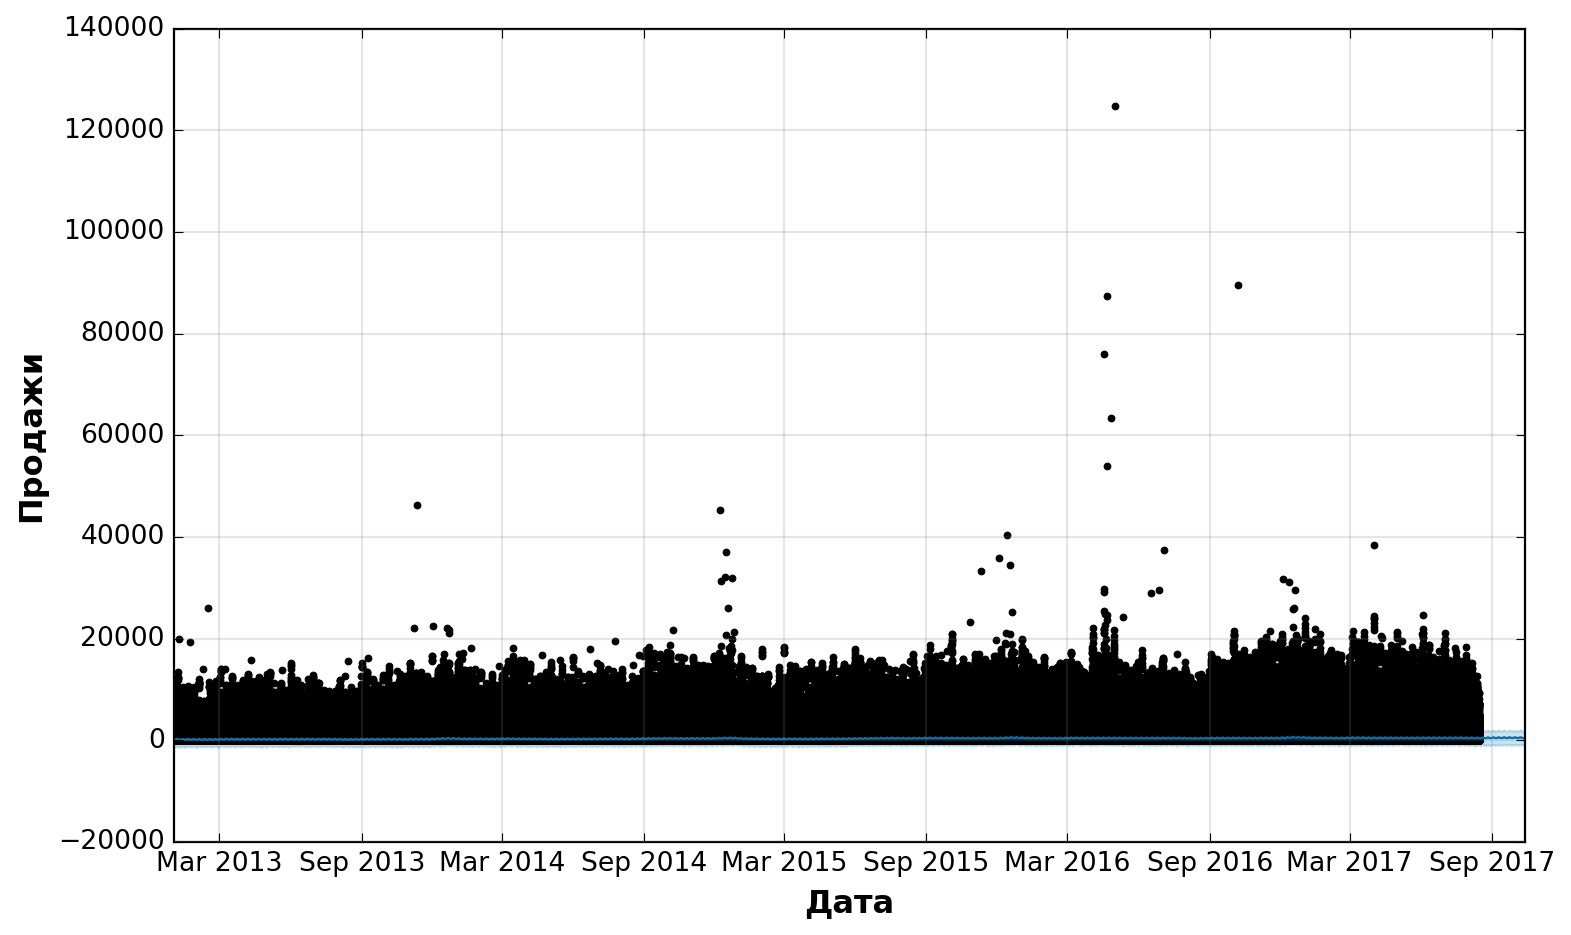

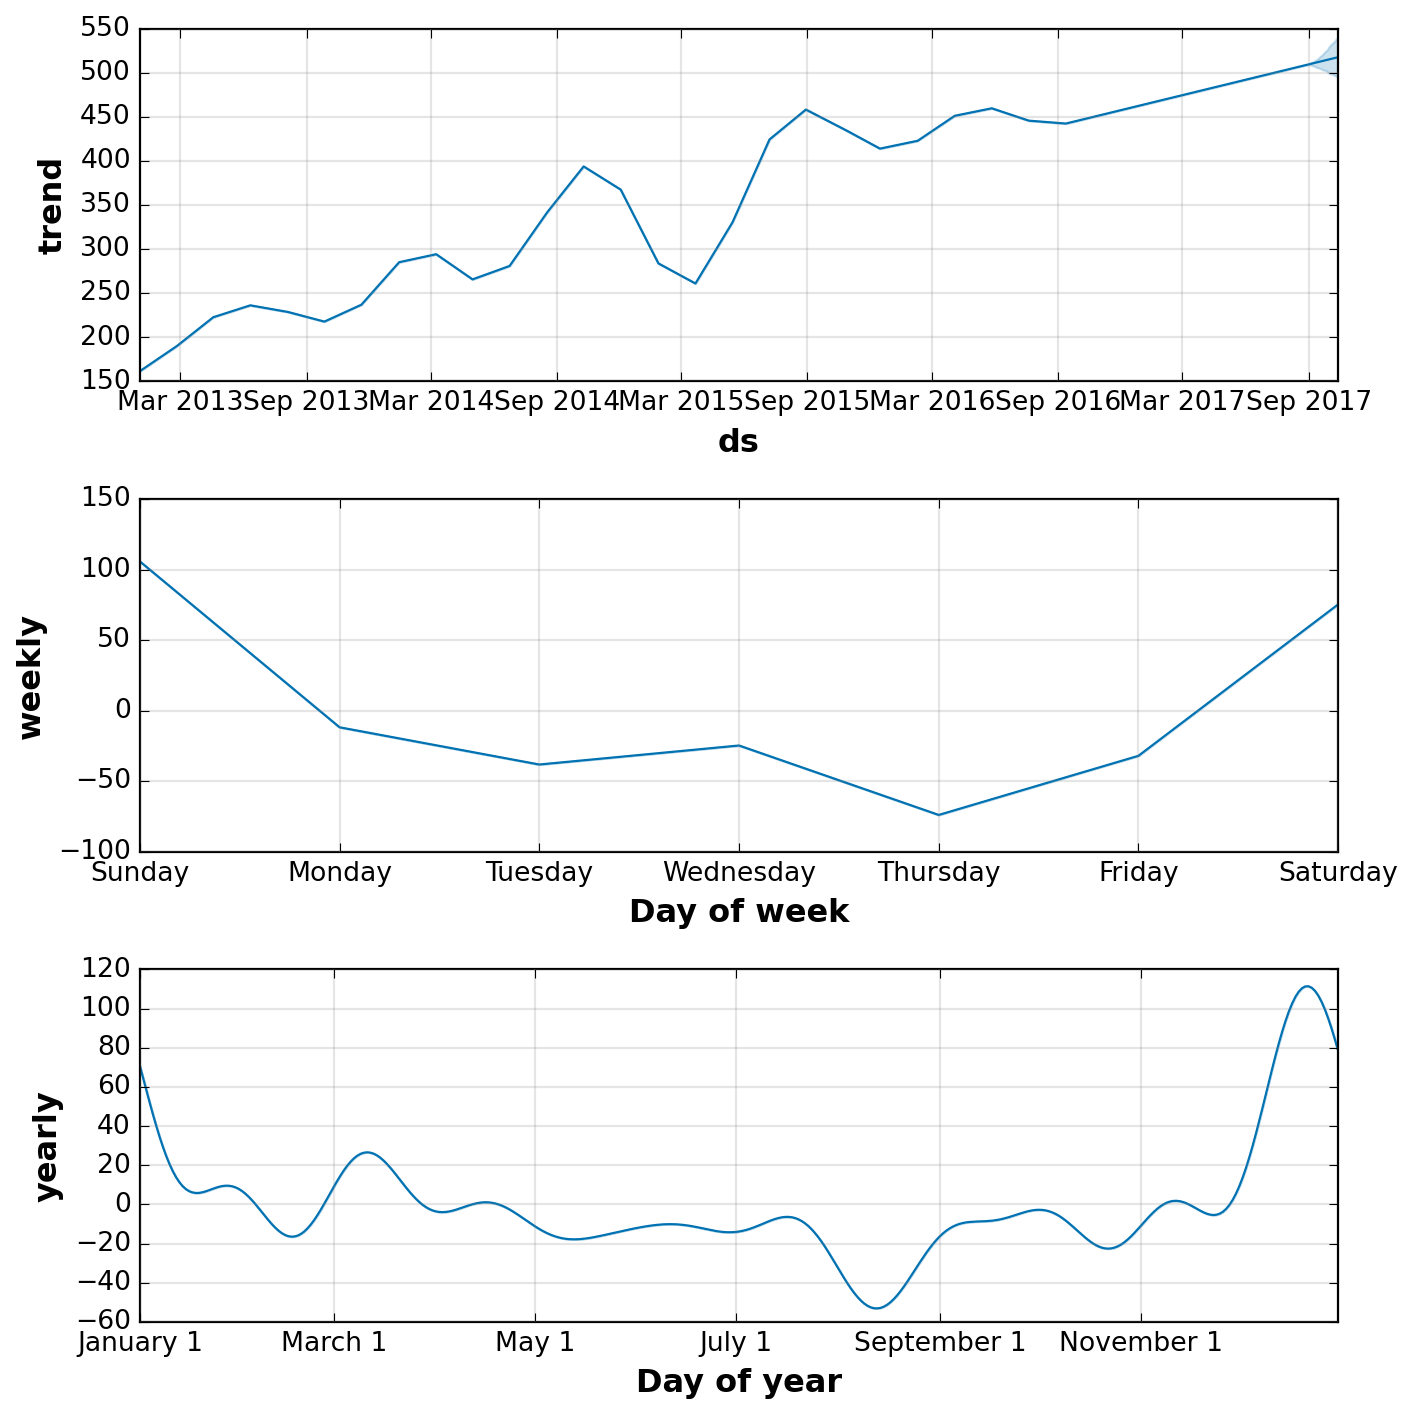

In [ ]:

fig = model.plot(forecast)

plt.xlabel('Дата')
plt.ylabel('Продажи')
plt.show()

# Вывод компонентов прогноза (тренд, сезонность и т.д.)
fig2 = model.plot_components(forecast)
plt.show()

In [ ]:
df

ds         y      residual
0       2013-01-01     0.000   6175.944223
1       2013-01-01     0.000   4012.457717
2       2013-01-01     0.000  12023.710330
3       2013-01-01     0.000   5229.877157
4       2013-01-01     0.000 -12310.409235
...            ...       ...           ...
3000883 2017-08-15   438.133           NaN
3000884 2017-08-15   154.553           NaN
3000885 2017-08-15  2419.729           NaN
3000886 2017-08-15   121.000           NaN
3000887 2017-08-15    16.000           NaN

[3000888 rows x 3 columns]

<Axes: title={'center': 'Periodogram'}, ylabel='Variance'>

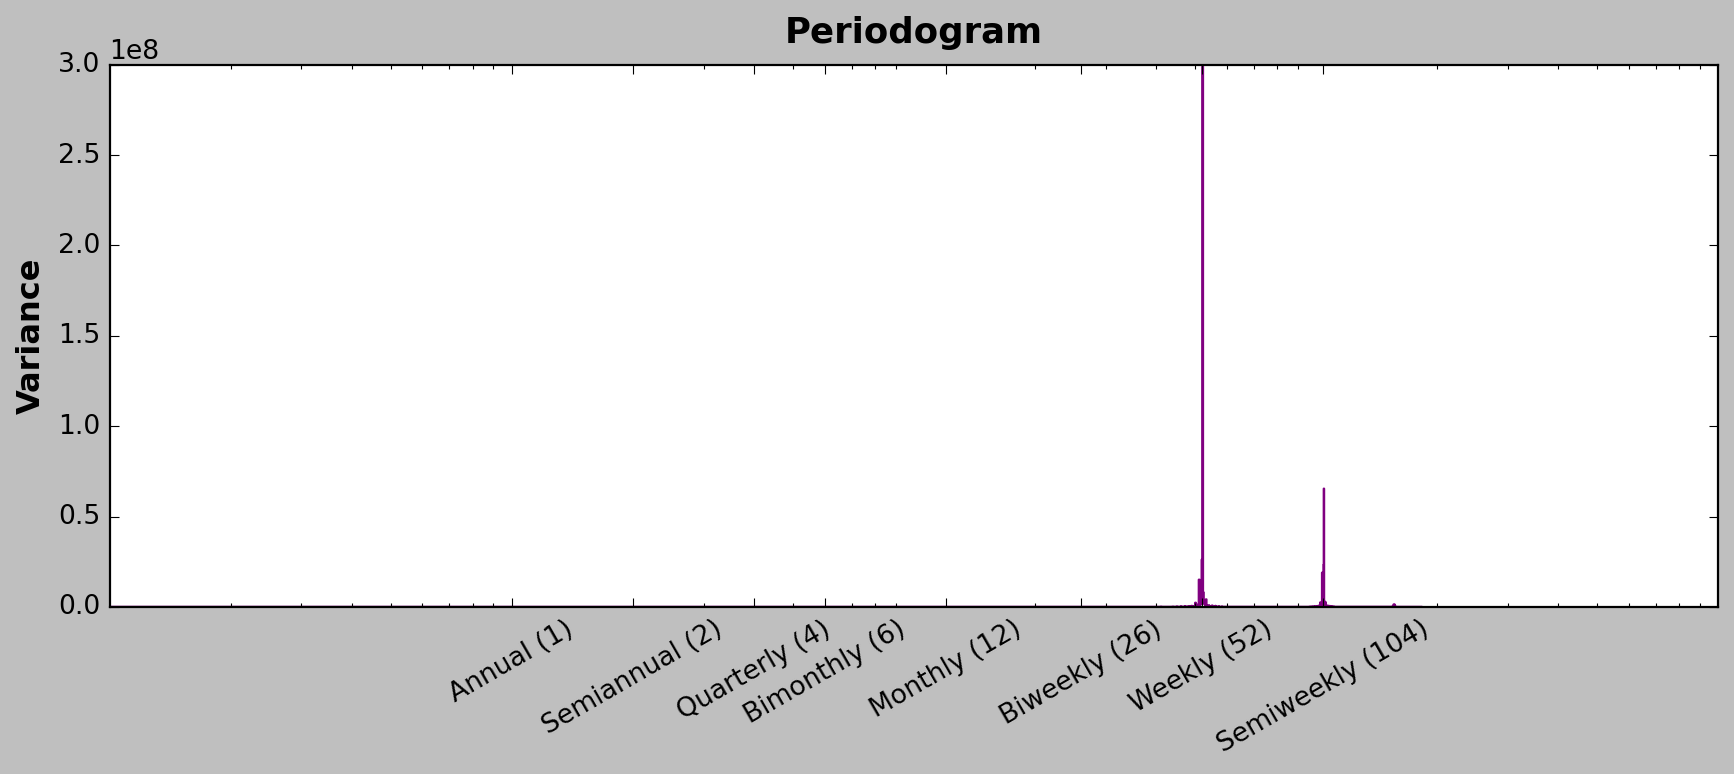

In [ ]:
df['residual'] = df['y'] - forecast[:len(df)]['trend'] * forecast[:len(df)]['weekly']

plot_periodogram(df['residual'].dropna())


In [ ]:
df

ds         y      residual
0       2013-01-01     0.000   6175.944223
1       2013-01-01     0.000   4012.457717
2       2013-01-01     0.000  12023.710330
3       2013-01-01     0.000   5229.877157
4       2013-01-01     0.000 -12310.409235
...            ...       ...           ...
3000883 2017-08-15   438.133           NaN
3000884 2017-08-15   154.553           NaN
3000885 2017-08-15  2419.729           NaN
3000886 2017-08-15   121.000           NaN
3000887 2017-08-15    16.000           NaN

[3000888 rows x 3 columns]

In [ ]:
forecast

ds       trend   yhat_lower   yhat_upper  trend_lower  \
0    2013-01-01  161.396270 -1194.210228  1623.290199   161.396270   
1    2013-01-02  161.922888 -1194.421291  1637.454274   161.922888   
2    2013-01-03  162.449507 -1321.492183  1546.043599   162.449507   
3    2013-01-04  162.976125 -1311.381538  1480.762245   162.976125   
4    2013-01-05  163.502744 -1152.824126  1578.023722   163.502744   
...         ...         ...          ...          ...          ...   
1739 2017-10-10  516.810754  -847.191965  1828.996542   496.445668   
1740 2017-10-11  517.000425  -911.433217  1772.743336   496.132632   
1741 2017-10-12  517.190097  -949.849007  1827.350105   495.609981   
1742 2017-10-13  517.379768  -932.203914  1893.601324   495.245133   
1743 2017-10-14  517.569440  -940.437458  2049.311825   494.894157   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0      161.396270       32.466686             32.466686             32.466686   
1      161.922888       39.651595             39.651595             39.651595   
2      162.449507      -15.905982            -15.905982            -15.905982   
3      162.976125       19.773475             19.773475             19.773475   
4      163.502744      121.079227            121.079227            121.079227   
...           ...             ...                   ...                   ...   
1739   536.942635      -47.518105            -47.518105            -47.518105   
1740   538.331092      -35.464775            -35.464775            -35.464775   
1741   539.007954      -86.192991            -86.192991            -86.192991   
1742   539.676879      -45.787266            -45.787266            -45.787266   
1743   540.501178       60.085440             60.085440             60.085440   

         weekly  weekly_lower  weekly_upper     yearly  yearly_lower  \
0    -38.265719    -38.265719    -38.265719  70.732404     70.732404   
1    -24.780053    -24.780053    -24.780053  64.431648     64.431648   
2    -74.015062    -74.015062    -74.015062  58.109080     58.109080   
3    -32.089836    -32.089836    -32.089836  51.863311     51.863311   
4     75.291759     75.291759     75.291759  45.787467     45.787467   
...         ...           ...           ...        ...           ...   
1739 -38.265719    -38.265719    -38.265719  -9.252387     -9.252387   
1740 -24.780053    -24.780053    -24.780053 -10.684722    -10.684722   
1741 -74.015062    -74.015062    -74.015062 -12.177929    -12.177929   
1742 -32.089836    -32.089836    -32.089836 -13.697429    -13.697429   
1743  75.291759     75.291759     75.291759 -15.206319    -15.206319   

      yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
0        70.732404                   0.0                         0.0   
1        64.431648                   0.0                         0.0   
2        58.109080                   0.0                         0.0   
3        51.863311                   0.0                         0.0   
4        45.787467                   0.0                         0.0   
...            ...                   ...                         ...   
1739     -9.252387                   0.0                         0.0   
1740    -10.684722                   0.0                         0.0   
1741    -12.177929                   0.0                         0.0   
1742    -13.697429                   0.0                         0.0   
1743    -15.206319                   0.0                         0.0   

      multiplicative_terms_upper        yhat  
0                            0.0  193.862955  
1                            0.0  201.574483  
2                            0.0  146.543524  
3                            0.0  182.749600  
4                            0.0  284.581970  
...                          ...         ...  
1739                         0.0  469.292649  
1740                         0.0  481.535650  
1741                         0.0  430.997106  

In [ ]:
sales = forecast.set_index('ds')['yhat'].to_period('D')

In [ ]:
plot_params_pred = dict(
    color="blue",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)

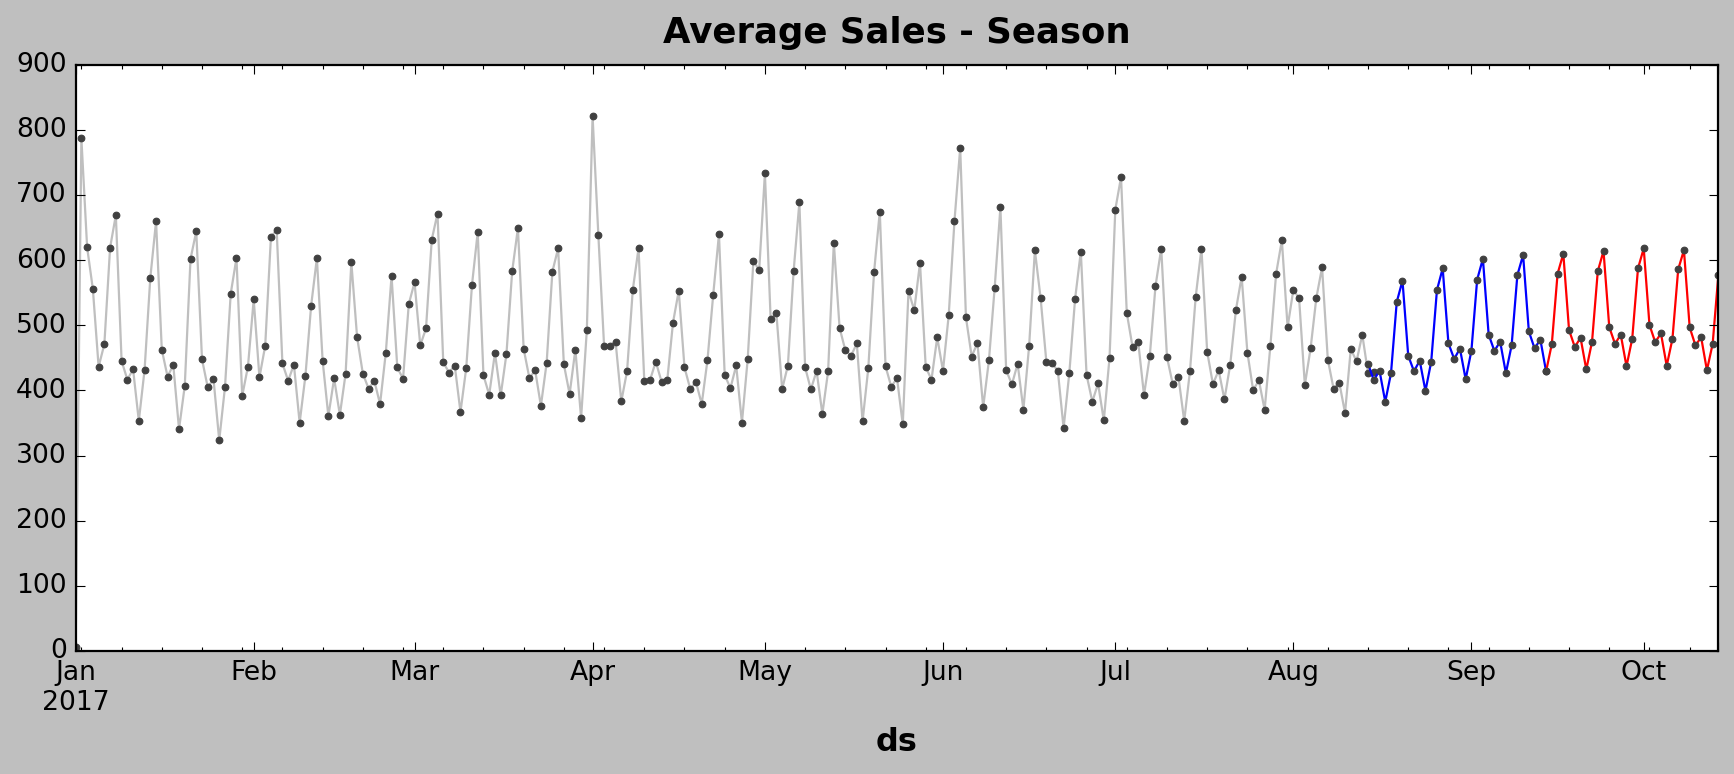

In [ ]:
ax = average_sales['2017-01':].plot(title="Average Sales - Season", **plot_params)
ax = sales['2017-08-14':'2017-09-14'].plot(**plot_params_pred)
ax = sales['2017-09-14':'2017-10-14'].plot(color = 'red', style = ".-", markeredgecolor = "0.25", markerfacecolor = "0.25", legend = False)

In [ ]:
test_sales = store_sales['2017-07-15':].copy(deep = True)

In [ ]:
store_sales = store_sales[:'2017-07-14']

In [ ]:
import seaborn as sns
from scipy.signal import periodogram
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.graphics.tsaplots import plot_pacf

In [ ]:
plt.style.use("classic")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
)
%config InlineBackend.figure_format = 'retina'


def lagplot(x, y=None, lag=1, standardize=False, ax=None, **kwargs):
    from matplotlib.offsetbox import AnchoredText
    x_ = x.shift(lag)
    if standardize:
        x_ = (x_ - x_.mean()) / x_.std()
    if y is not None:
        y_ = (y - y.mean()) / y.std() if standardize else y
    else:
        y_ = x
    corr = y_.corr(x_)
    if ax is None:
        fig, ax = plt.subplots()
    scatter_kws = dict(
        alpha=0.75,
        s=3,
    )
    line_kws = dict(color='C3', )
    ax = sns.regplot(x=x_,
                     y=y_,
                     scatter_kws=scatter_kws,
                     line_kws=line_kws,
                     lowess=True,
                     ax=ax,
                     **kwargs)
    at = AnchoredText(
        f"{corr:.2f}",
        prop=dict(size="large"),
        frameon=True,
        loc="upper left",
    )
    at.patch.set_boxstyle("square, pad=0.0")
    ax.add_artist(at)
    ax.set(title=f"Lag {lag}", xlabel=x_.name, ylabel=y_.name)
    return ax


def plot_lags(x, y=None, lags=6, nrows=1, lagplot_kwargs={}, **kwargs):
    import math
    kwargs.setdefault('nrows', nrows)
    kwargs.setdefault('ncols', math.ceil(lags / nrows))
    kwargs.setdefault('figsize', (kwargs['ncols'] * 2, nrows * 2 + 0.5))
    fig, axs = plt.subplots(sharex=True, sharey=True, squeeze=False, **kwargs)
    for ax, k in zip(fig.get_axes(), range(kwargs['nrows'] * kwargs['ncols'])):
        if k + 1 <= lags:
            ax = lagplot(x, y, lag=k + 1, ax=ax, **lagplot_kwargs)
            ax.set_title(f"Lag {k + 1}", fontdict=dict(fontsize=14))
            ax.set(xlabel="", ylabel="")
        else:
            ax.axis('off')
    plt.setp(axs[-1, :], xlabel=x.name)
    plt.setp(axs[:, 0], ylabel=y.name if y is not None else x.name)
    fig.tight_layout(w_pad=0.1, h_pad=0.1)
    return fig

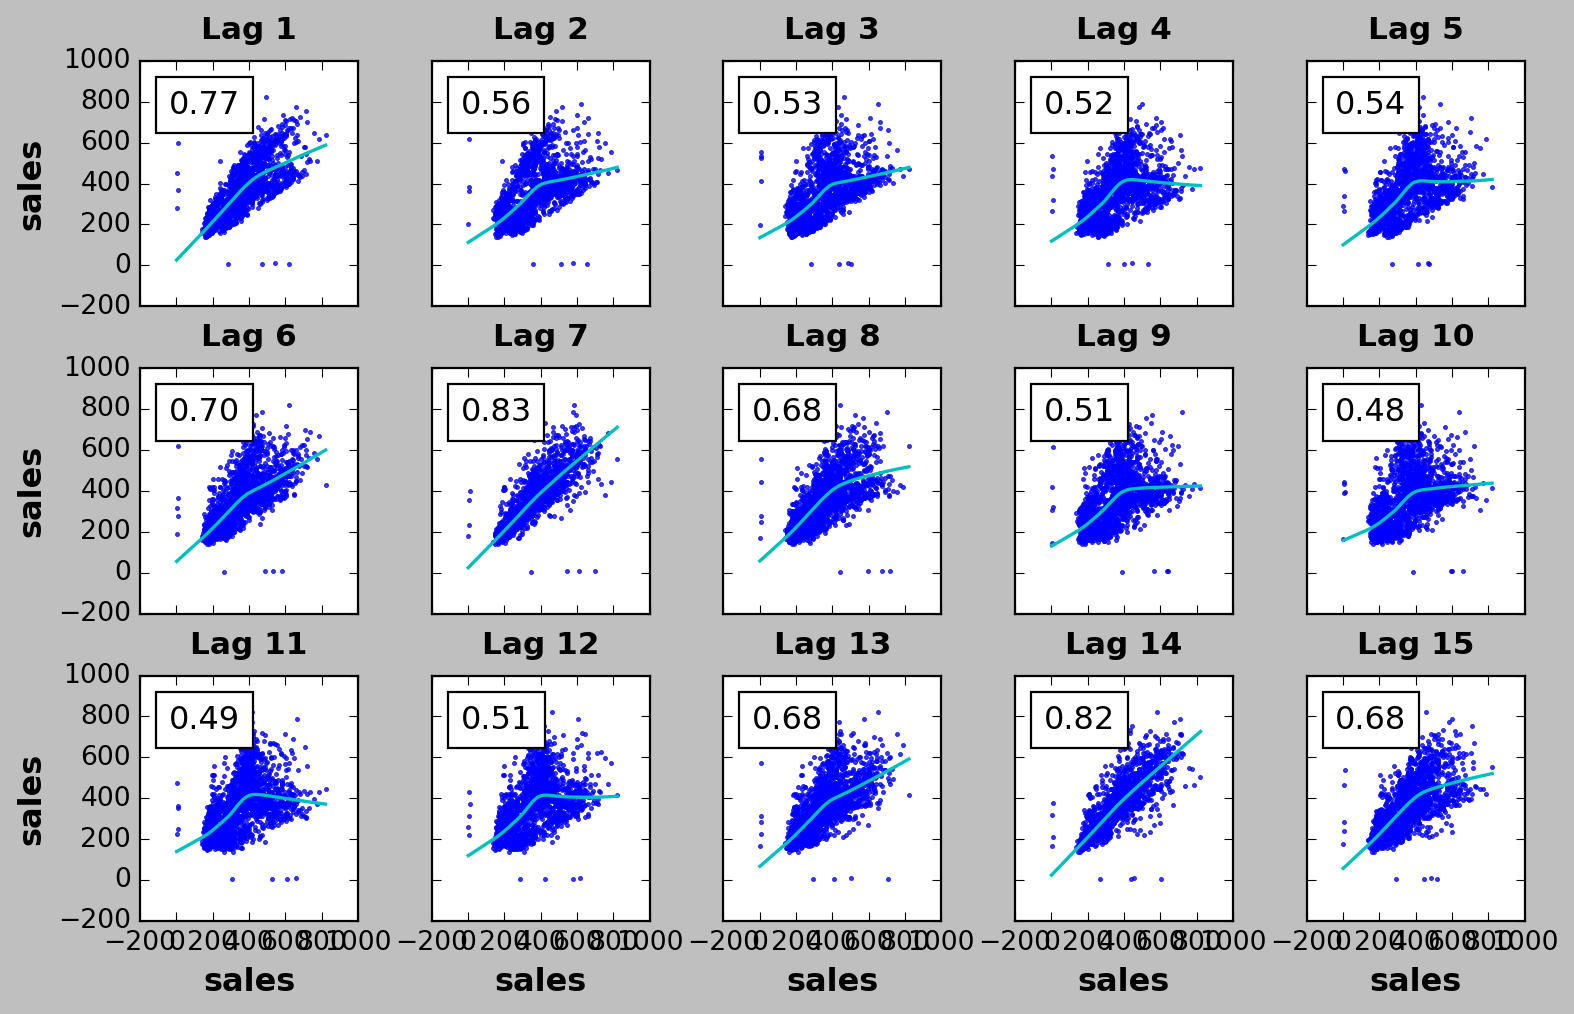

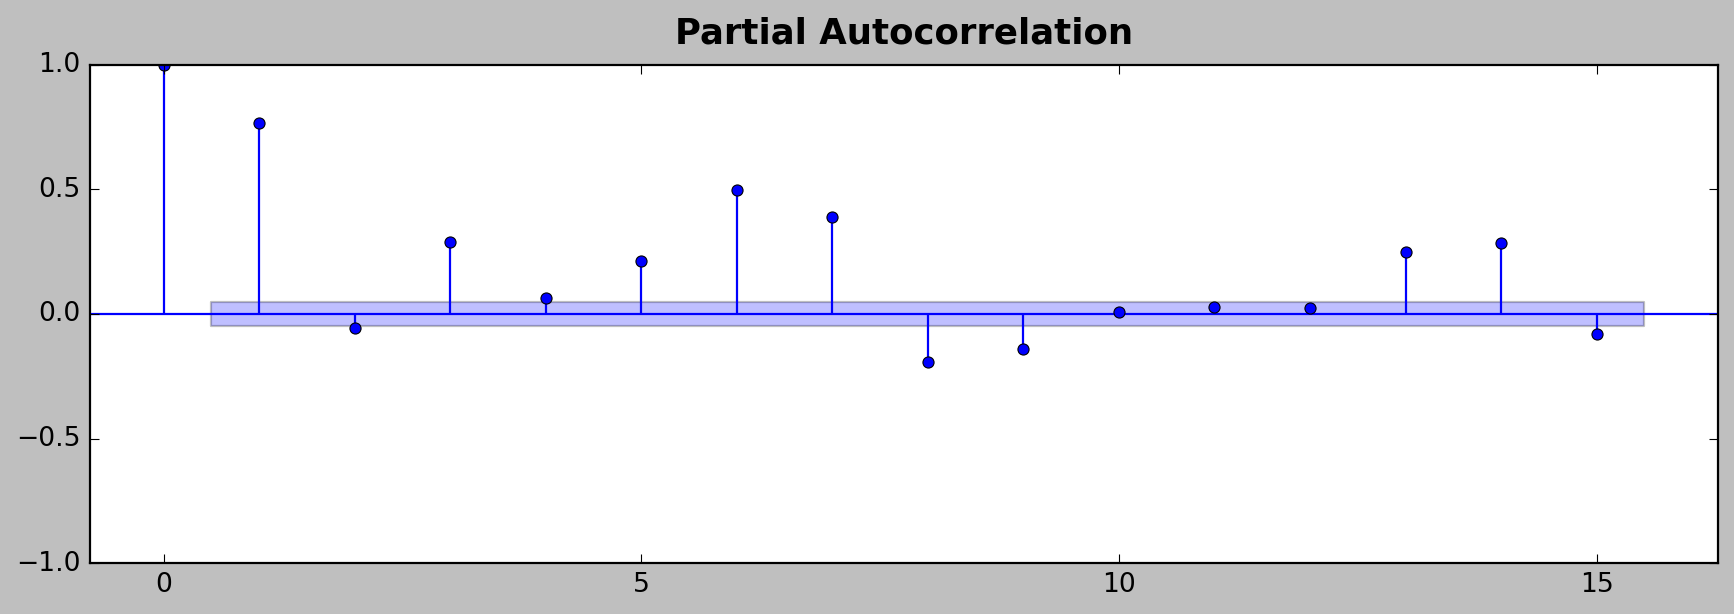

In [ ]:
_ = plot_lags(average_sales, lags=15, nrows=3)
_ = plot_pacf(average_sales, lags=15)

In [ ]:
def make_lags(ts, lags):
    return pd.concat(
        {
            f'y_lag_{i}': ts.shift(i)
            for i in range(1, lags + 1)
        },
        axis=1)


X = make_lags(average_sales, lags=14)
X = X.fillna(0.0)

In [ ]:
y = average_sales.copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=30, shuffle=False)

In [ ]:
model = LinearRegression()  # `fit_intercept=True` since we didn't use DeterministicProcess
model.fit(X_train, y_train)
y_pred = pd.Series(model.predict(X_train), index=y_train.index)
y_fore = pd.Series(model.predict(X_test), index=y_test.index)

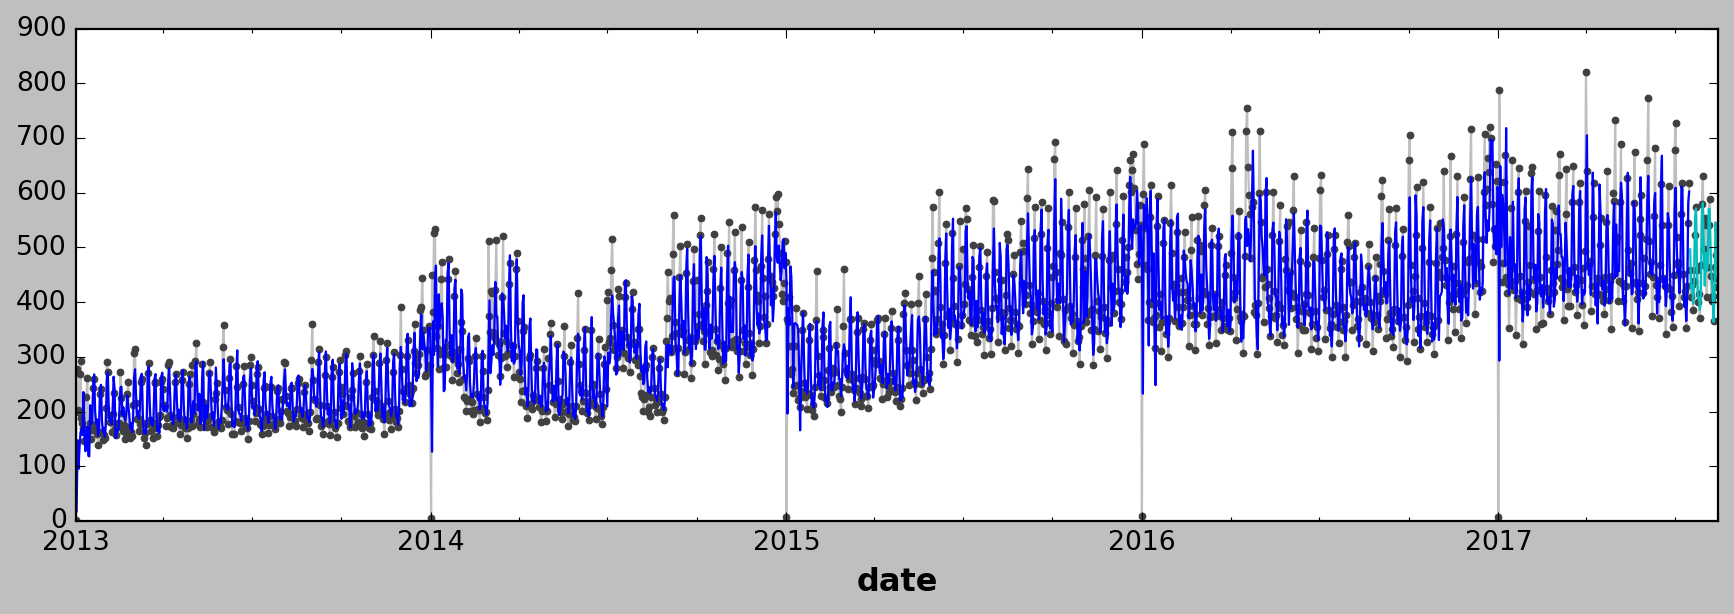

In [ ]:
ax = y_train.plot(**plot_params)
ax = y_test.plot(**plot_params)
ax = y_pred.plot(ax=ax)
_ = y_fore.plot(ax=ax, color='C3')

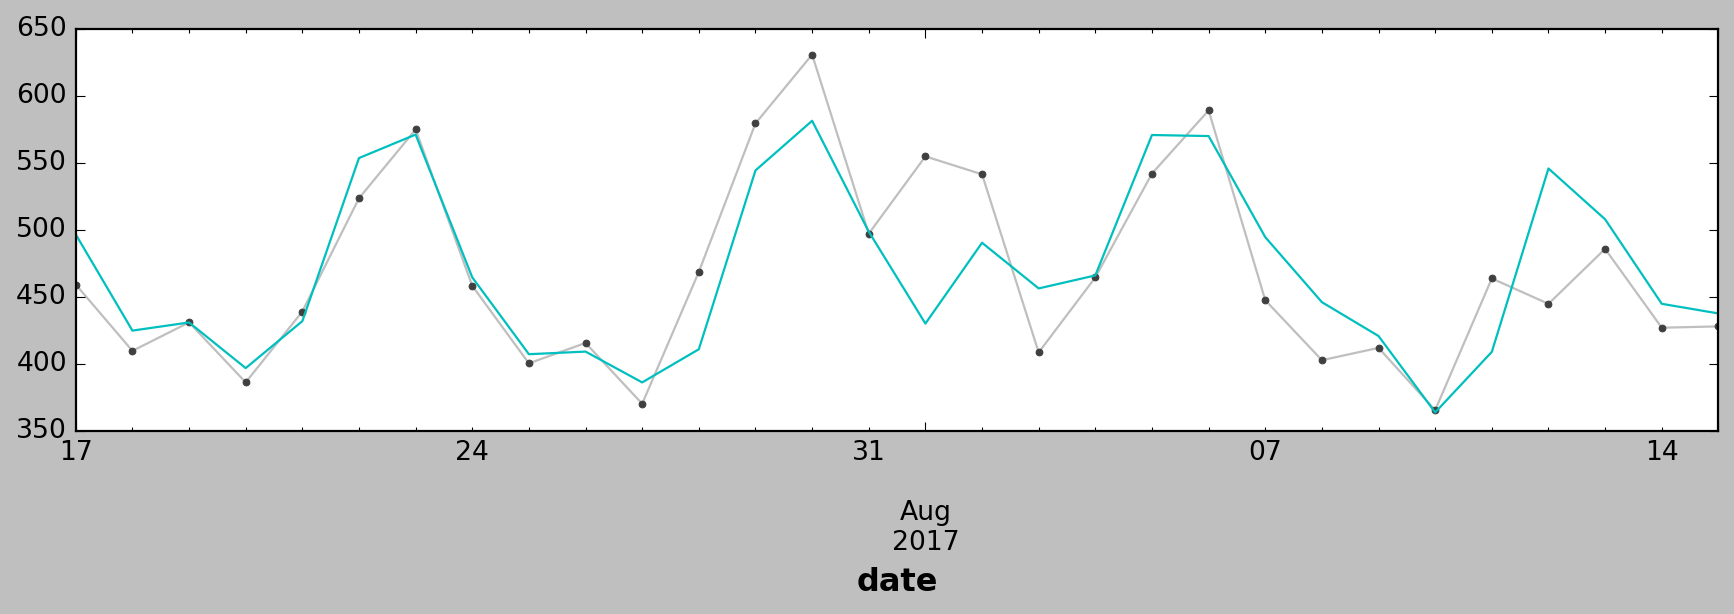

In [ ]:
ax = y_test.plot(**plot_params)
_ = y_fore.plot(ax=ax, color='C3')

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, y_fore)
rmse = np.sqrt(mean_squared_error(y_test, y_fore))

In [ ]:
tunnel = pd.read_csv("/content/train.csv", parse_dates=["date"])
tunnel['date'] = pd.to_datetime(tunnel['date'])
df = tunnel[['date', 'sales']].rename(columns={'date': 'ds', 'sales': 'y'})

In [ ]:
import prophet
from prophet import Prophet

In [ ]:
model = Prophet(
    seasonality_mode='additive',
    weekly_seasonality=True,
    seasonality_prior_scale=10
)


model.fit(df)
future = model.make_future_dataframe(periods=60)
forecast = model.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphs2gt7ck/ny1q32tt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphs2gt7ck/ixs_hpu2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33087', 'data', 'file=/tmp/tmphs2gt7ck/ny1q32tt.json', 'init=/tmp/tmphs2gt7ck/ixs_hpu2.json', 'output', 'file=/tmp/tmphs2gt7ck/prophet_modelhpogvka_/prophet_model-20250512092346.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:23:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:30:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
forecast['residual'] = forecast['yhat'] - forecast[:len(df)]['trend'] - forecast[:len(df)]['weekly']
ostatki = forecast.set_index('ds')['residual'].to_period('D')

In [ ]:
xd = forecast.set_index('ds')['yhat'].to_period('D')

In [ ]:
xd = xd['2017-06-15':'2017-07-14']

In [ ]:
ostatki = ostatki[:'2017-07-14']

<Axes: xlabel='ds'>

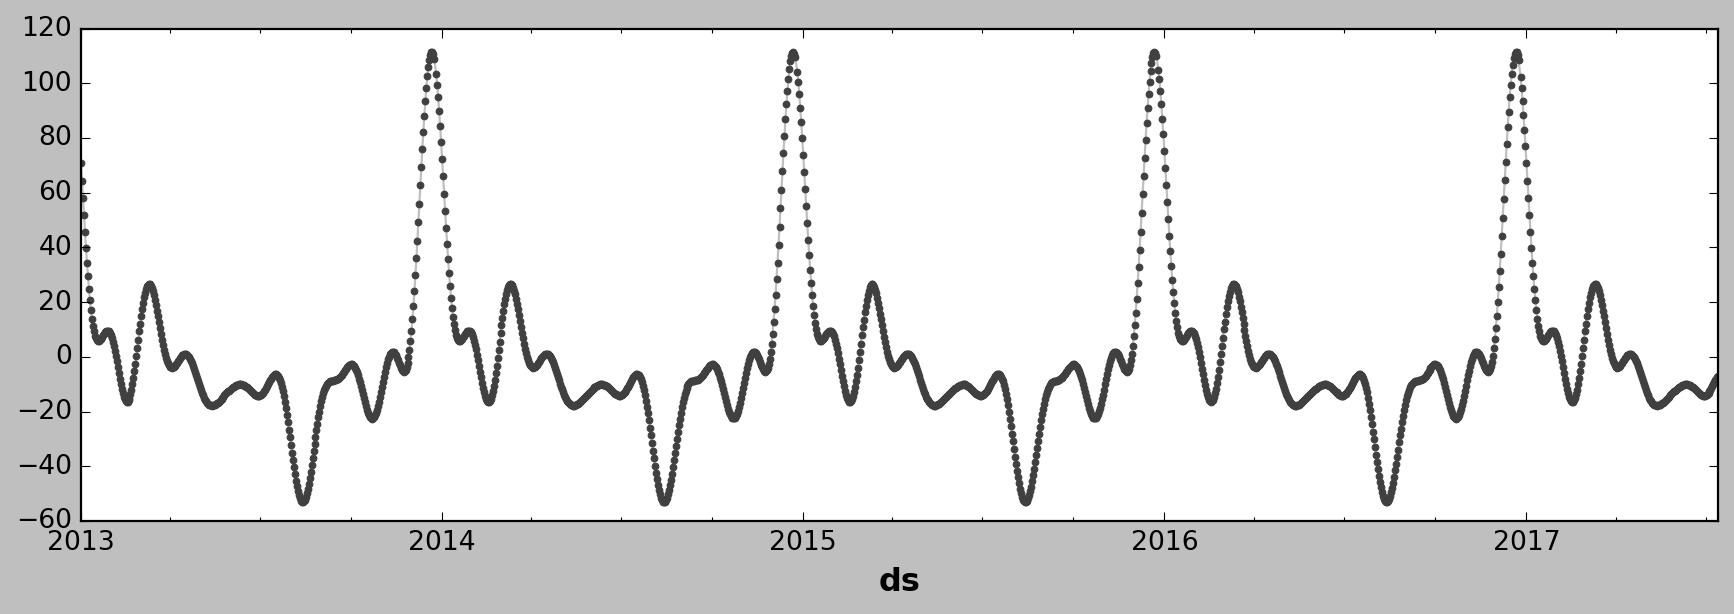

In [ ]:
ostatki['2013-01-01':].plot(**plot_params)

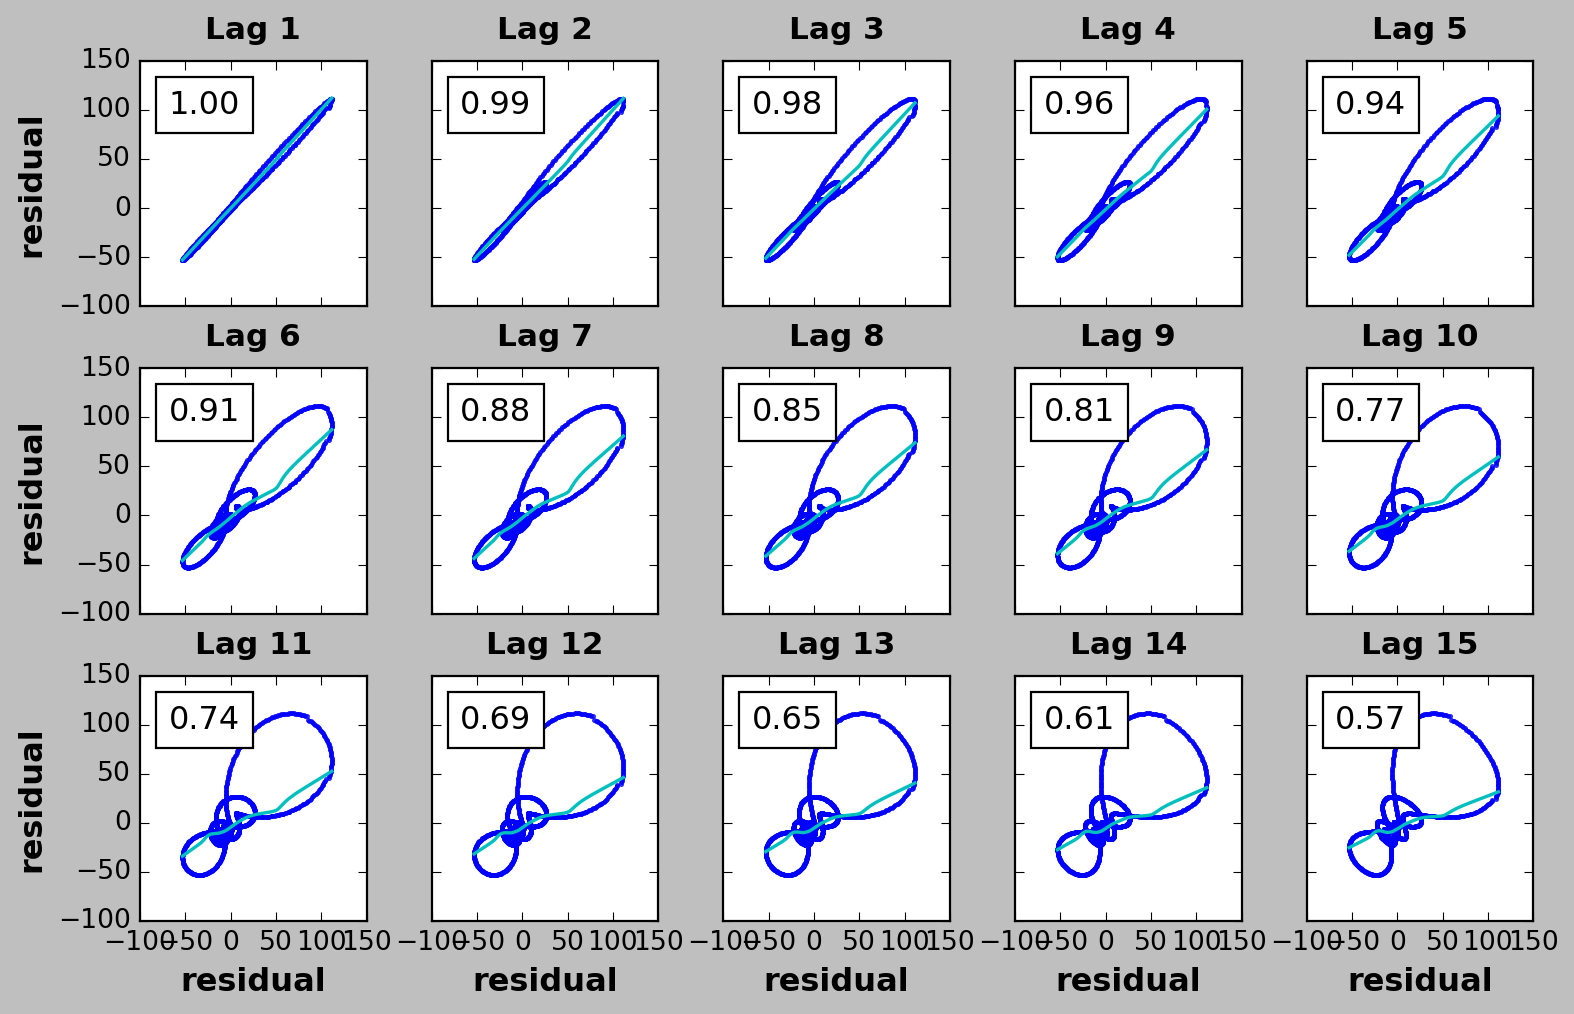

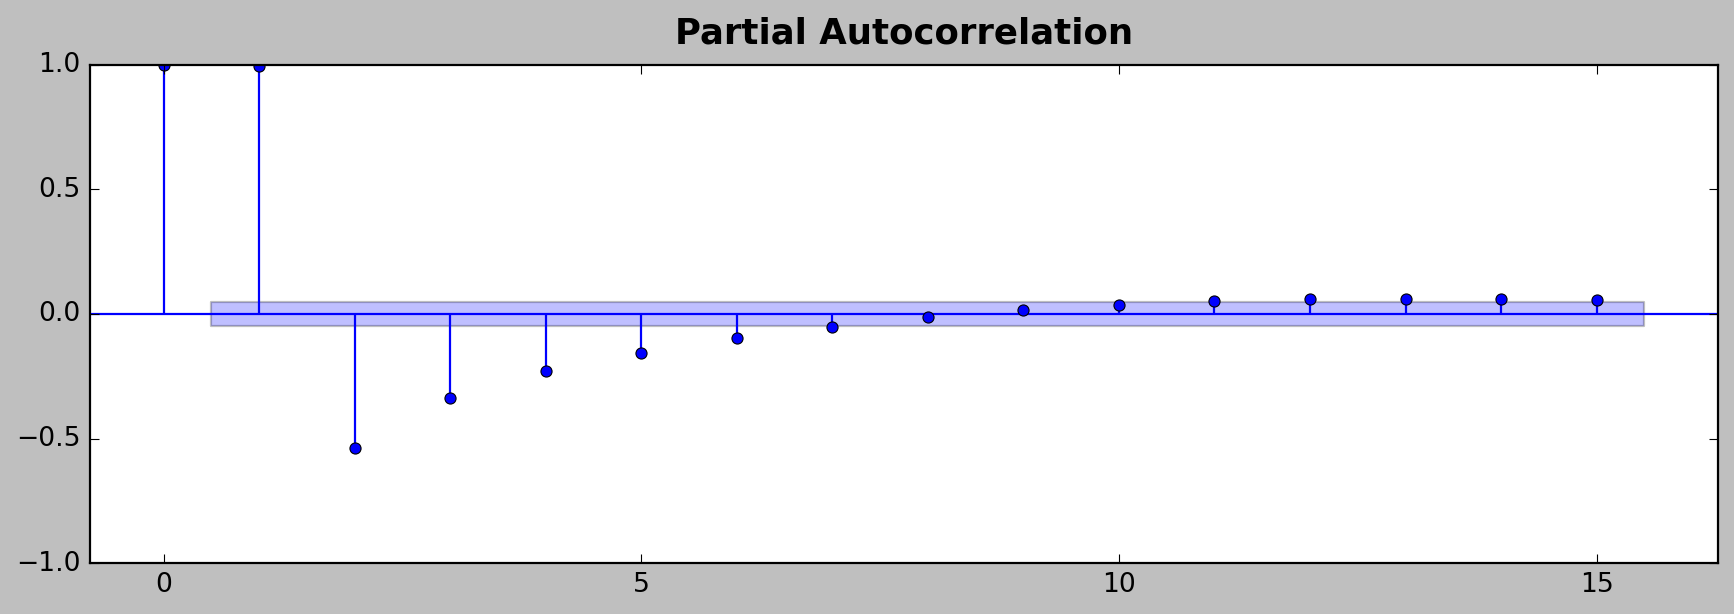

In [ ]:
_ = plot_lags(ostatki, lags=15, nrows=3)
_ = plot_pacf(ostatki, lags=15)

In [ ]:
X1 = make_lags(ostatki, lags=4)
X1 = X1.fillna(0.0)

In [ ]:
y1 = ostatki.copy()
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=30, shuffle=False)

In [ ]:
model = LinearRegression()  # `fit_intercept=True` since we didn't use DeterministicProcess
model.fit(X1_train, y1_train)
y1_pred = pd.Series(model.predict(X1_train), index=y1_train.index)
y1_fore = pd.Series(model.predict(X1_test), index=y1_test.index)

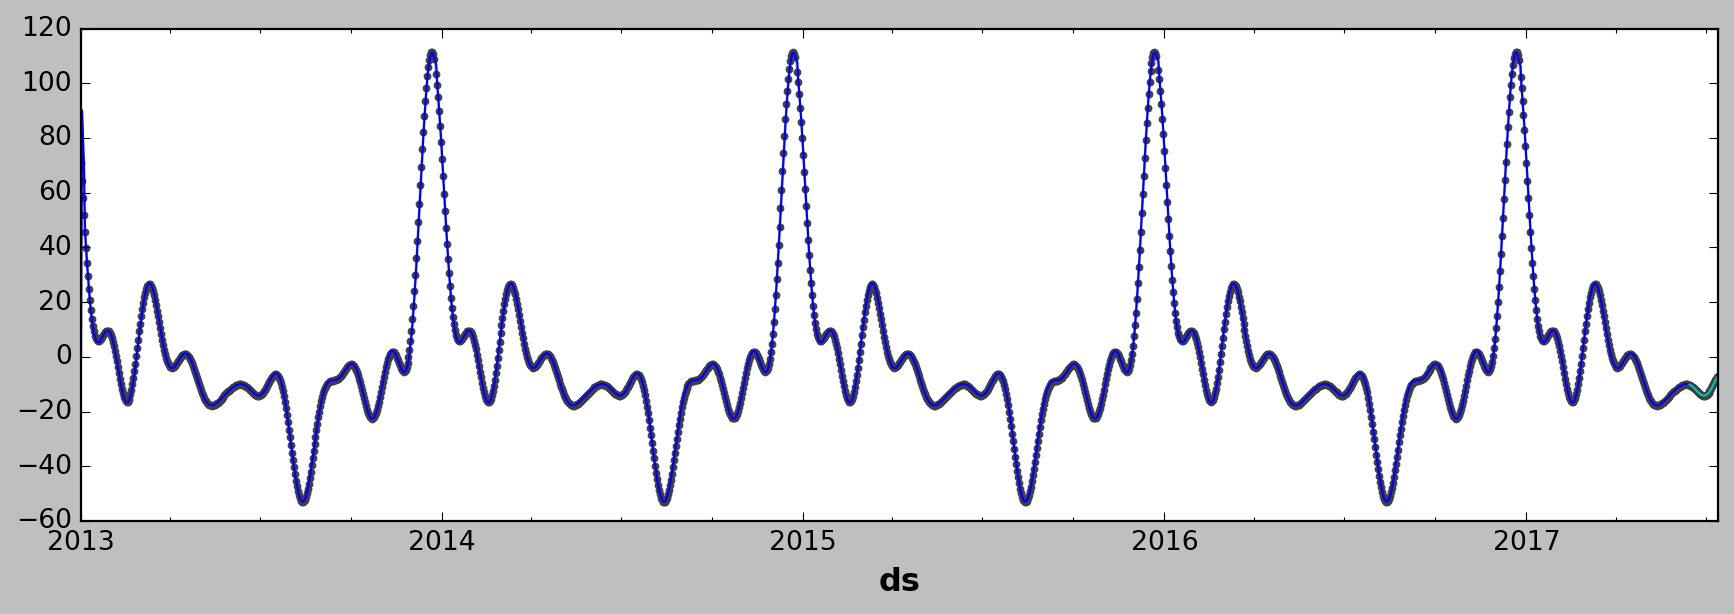

In [ ]:
ax = y1_train.plot(**plot_params)
ax = y1_test.plot(**plot_params)
ax = y1_pred.plot(ax=ax)
_ = y1_fore.plot(ax=ax, color='C3')

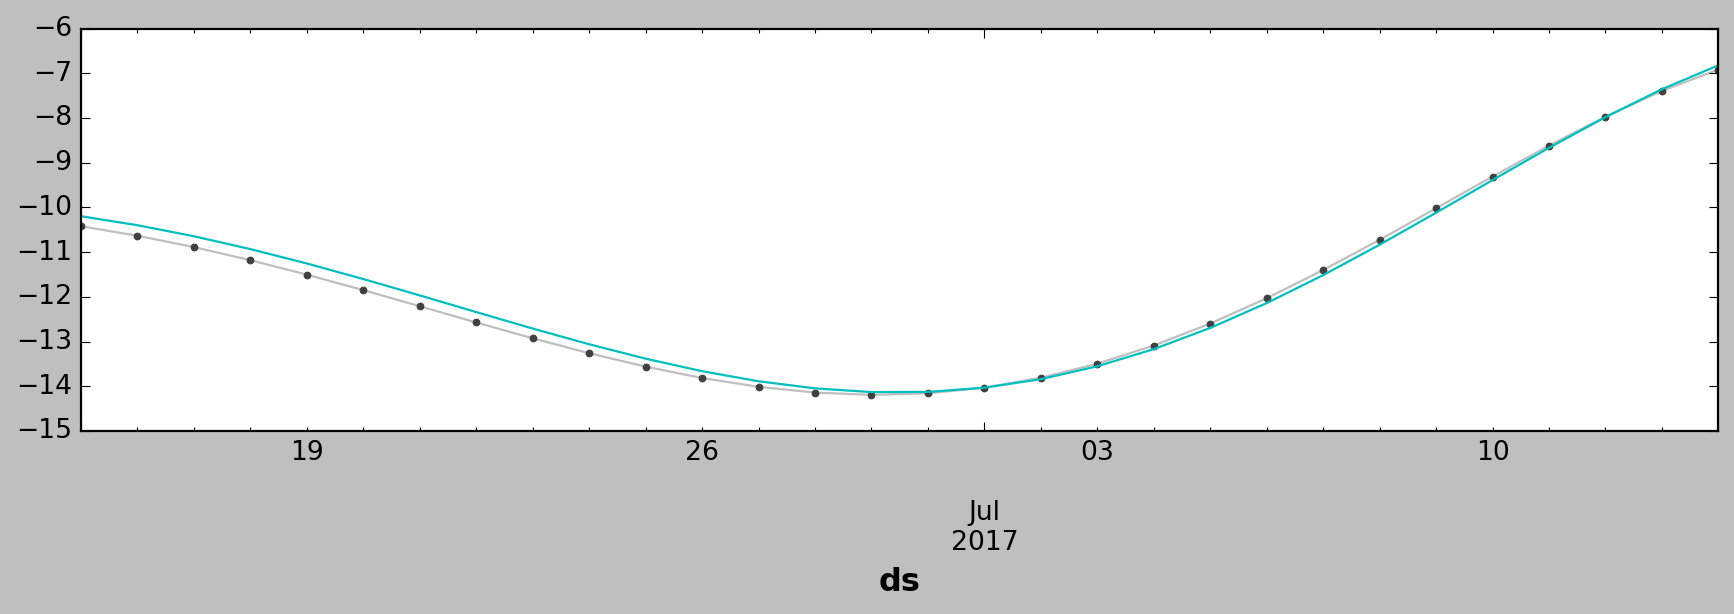

In [ ]:
ax = y1_test.plot(**plot_params)
_ = y1_fore.plot(ax=ax, color='C3')

In [ ]:
def exponential_smoothing(series, alpha):
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

In [ ]:
average_sales

date
2013-01-01      1.409438
2013-01-02    278.390807
2013-01-03    202.840197
2013-01-04    198.911154
2013-01-05    267.873244
                 ...    
2017-08-11    463.733851
2017-08-12    444.798280
2017-08-13    485.768618
2017-08-14    427.004717
2017-08-15    427.980884
Freq: D, Name: sales, Length: 1684, dtype: float64

In [ ]:
av = average_sales.copy(deep = True)

In [ ]:
av.index = av.index.astype(str)

<ipython-input-31-ab191fe8cc54>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  result = [series[0]] # first value is same as series
<ipython-input-31-ab191fe8cc54>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  result.append(alpha * series[n] + (1 - alpha) * result[n-1])


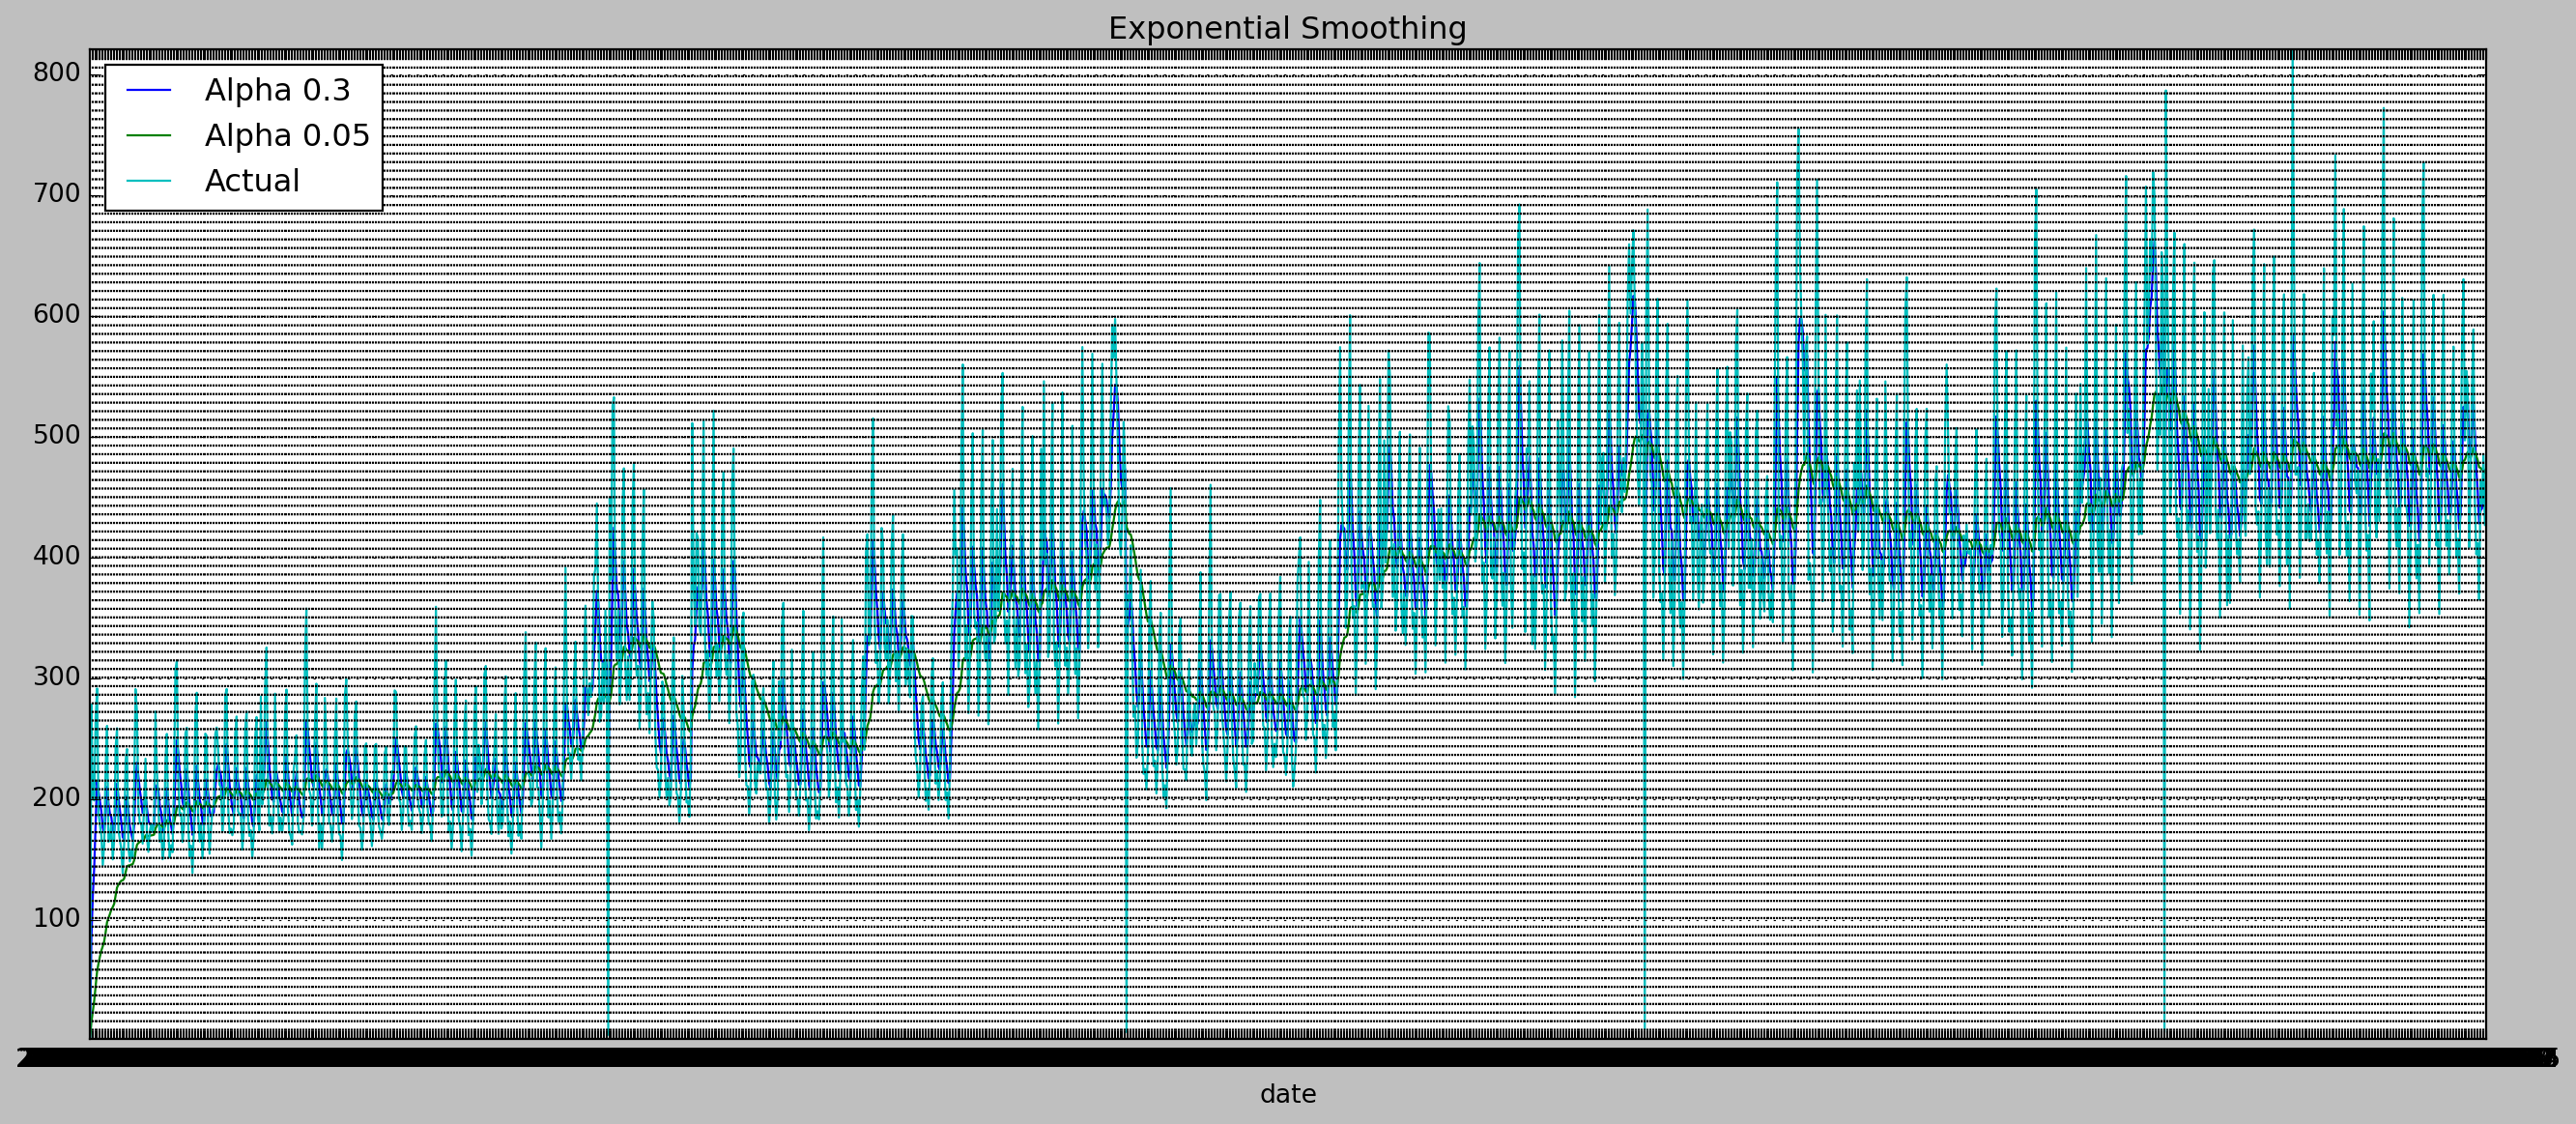

In [ ]:
with plt.style.context('classic'):
    plt.figure(figsize=(20, 8))
    dates = av.index
    for alpha in [0.3, 0.05]:
        # Передаем даты как X и сглаженные значения как Y
        plt.plot(dates,
                 exponential_smoothing(av, alpha),
                 label="Alpha {}".format(alpha))
    av.plot(color = "c", label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Exponential Smoothing")
    plt.grid(True)

In [ ]:
def double_exponential_smoothing(series, alpha, beta):
    result = [series[0]]
    for n in range(1, len(series)+1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series): # прогнозируем
            value = result[-1]
        else:
            value = series[n]
        last_level, level = level, alpha*value + (1-alpha)*(level+trend)
        trend = beta*(level-last_level) + (1-beta)*trend
        result.append(level+trend)
    return result


In [ ]:
av

date
2013-01-01      1.409438
2013-01-02    278.390807
2013-01-03    202.840197
2013-01-04    198.911154
2013-01-05    267.873244
                 ...    
2017-08-11    463.733851
2017-08-12    444.798280
2017-08-13    485.768618
2017-08-14    427.004717
2017-08-15    427.980884
Name: sales, Length: 1684, dtype: float64

<ipython-input-37-c5abc3b21e22>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  result = [series[0]]
<ipython-input-37-c5abc3b21e22>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  level, trend = series[0], series[1] - series[0]
<ipython-input-37-c5abc3b21e22>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  value = series[n]


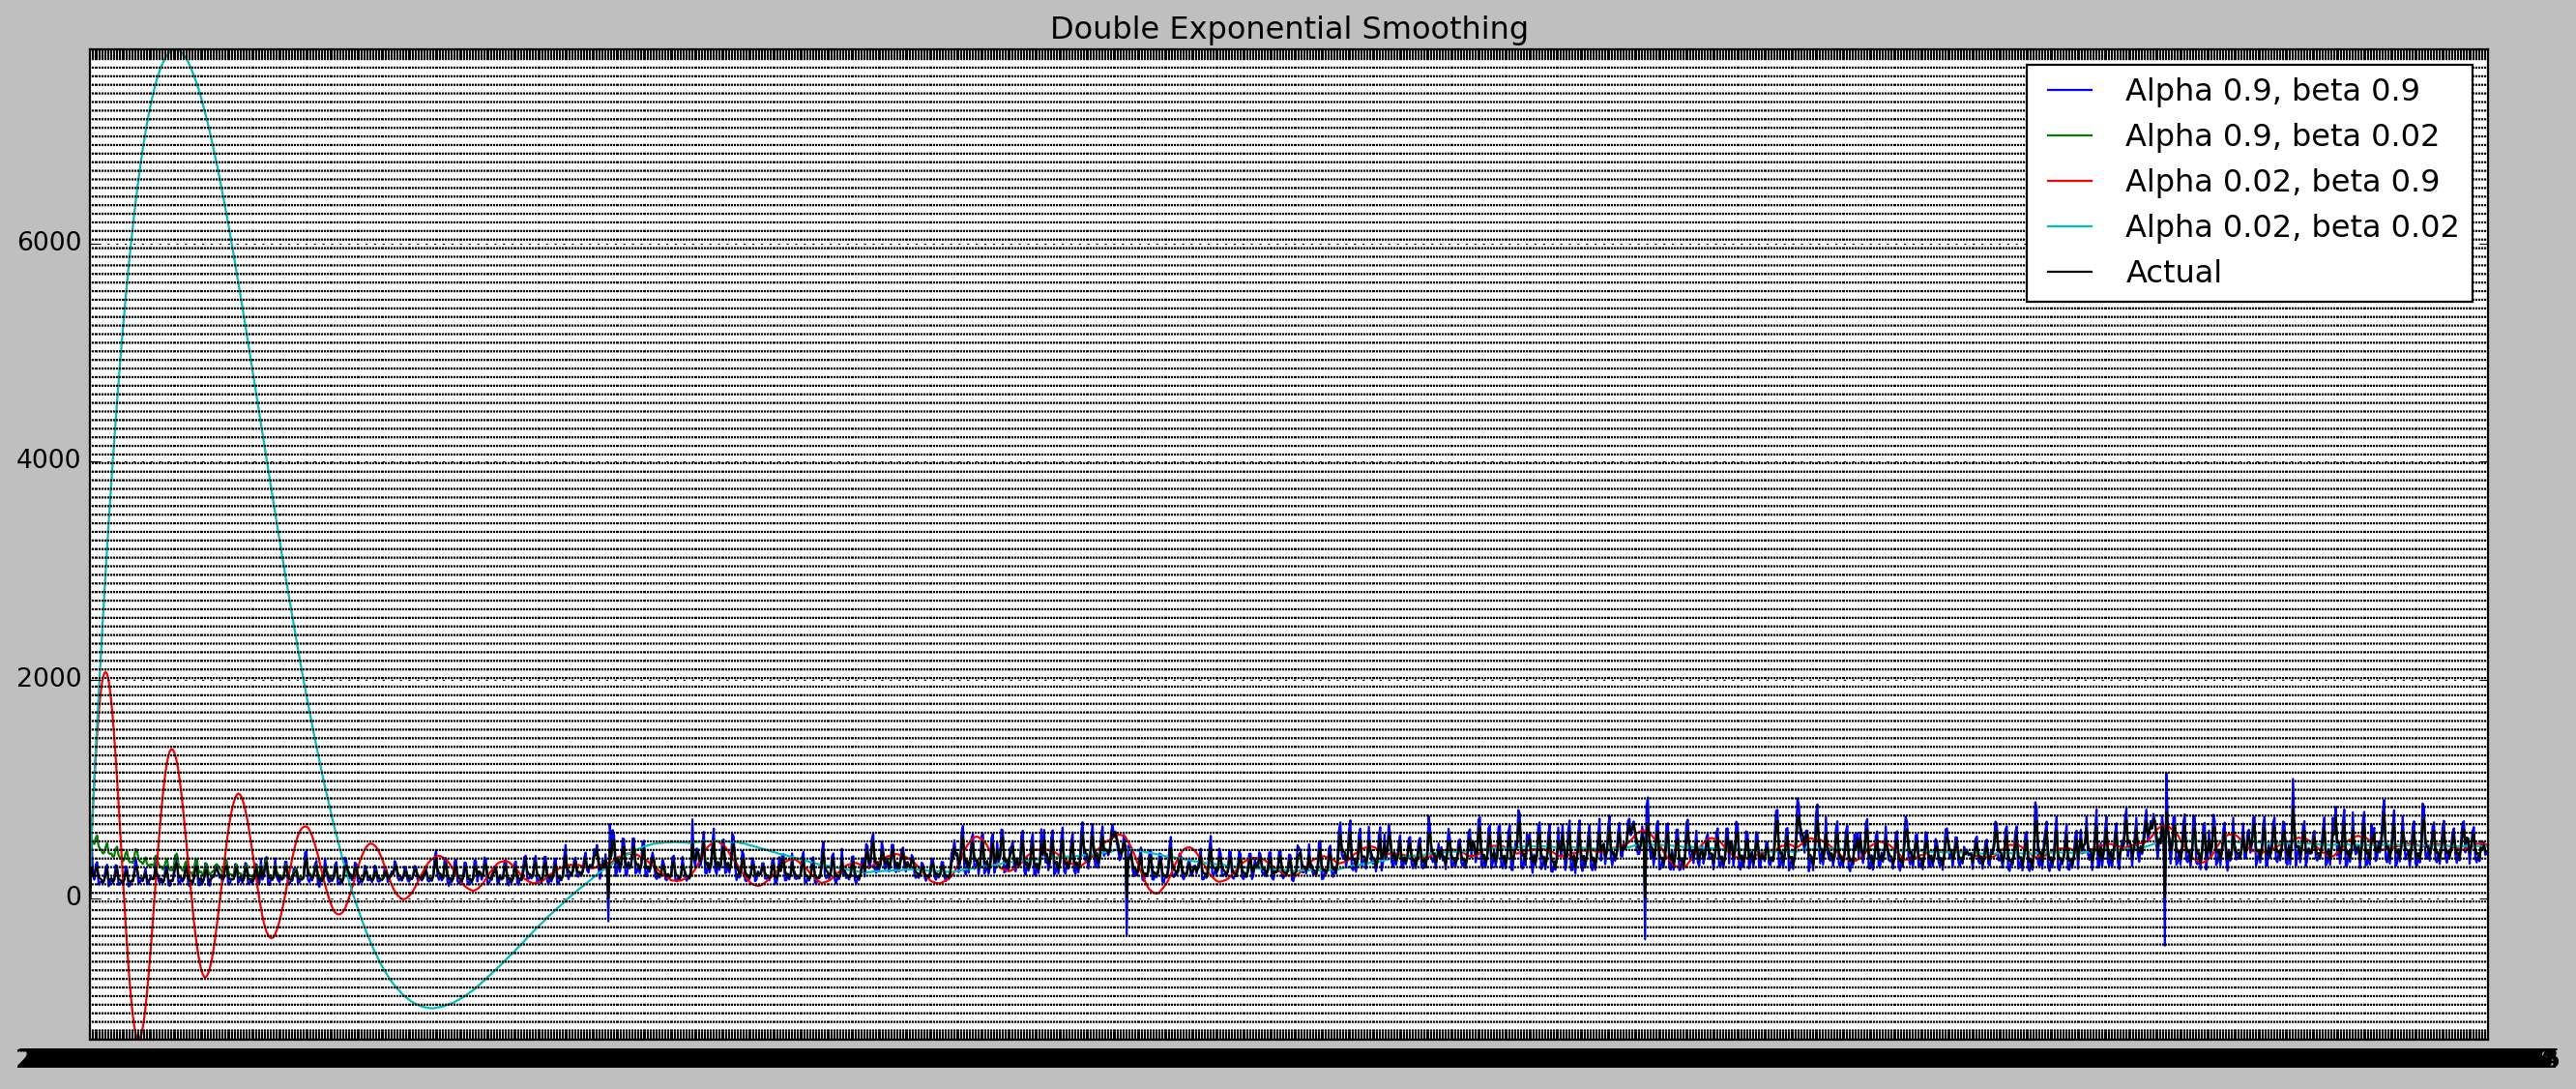

In [ ]:
with plt.style.context('classic'):
    plt.figure(figsize=(20, 8))
    for alpha in [0.9, 0.02]:
        for beta in [0.9, 0.02]:
            plt.plot(double_exponential_smoothing(av, alpha, beta), label="Alpha {}, beta {}".format(alpha, beta))
    plt.plot(av, color = "black", label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Double Exponential Smoothing")
    plt.grid(True)

In [ ]:
class HoltWinters:

    """
    Модель Хольта-Винтерса с методом Брутлага для детектирования аномалий
    https://fedcsis.org/proceedings/2012/pliks/118.pdf

    # series - исходный временной ряд
    # slen - длина сезона
    # alpha, beta, gamma - коэффициенты модели Хольта-Винтерса
    # n_preds - горизонт предсказаний
    # scaling_factor - задаёт ширину доверительного интервала по Брутлагу (обычно принимает значения от 2 до 3)

    """

    def __init__(self, series, slen, alpha, beta, gamma, n_preds, scaling_factor=1.96):
        self.series = series
        self.slen = slen
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma
        self.n_preds = n_preds
        self.scaling_factor = scaling_factor

    def initial_trend(self):
        sum = 0.0
        for i in range(self.slen):
            sum += float(self.series[i+self.slen] - self.series[i]) / self.slen
        return sum / self.slen

    def initial_seasonal_components(self):
        seasonals = {}
        season_averages = []
        n_seasons = int(len(self.series)/self.slen)
        # вычисляем сезонные средние
        for j in range(n_seasons):
            season_averages.append(sum(self.series[self.slen*j:self.slen*j+self.slen])/float(self.slen))
        # вычисляем начальные значения
        for i in range(self.slen):
            sum_of_vals_over_avg = 0.0
            for j in range(n_seasons):
                sum_of_vals_over_avg += self.series[self.slen*j+i]-season_averages[j]
            seasonals[i] = sum_of_vals_over_avg/n_seasons
        return seasonals

    def triple_exponential_smoothing(self):
        self.result = []
        self.Smooth = []
        self.Season = []
        self.Trend = []
        self.PredictedDeviation = []
        self.UpperBond = []
        self.LowerBond = []

        seasonals = self.initial_seasonal_components()

        for i in range(len(self.series)+self.n_preds):
            if i == 0: # инициализируем значения компонент
                smooth = self.series[0]
                trend = self.initial_trend()
                self.result.append(self.series[0])
                self.Smooth.append(smooth)
                self.Trend.append(trend)
                self.Season.append(seasonals[i%self.slen])

                self.PredictedDeviation.append(0)

                self.UpperBond.append(self.result[0] +
                                      self.scaling_factor *
                                      self.PredictedDeviation[0])

                self.LowerBond.append(self.result[0] -
                                      self.scaling_factor *
                                      self.PredictedDeviation[0])

                continue
            if i >= len(self.series): # прогнозируем
                m = i - len(self.series) + 1
                self.result.append((smooth + m*trend) + seasonals[i%self.slen])

                # во время прогноза с каждым шагом увеличиваем неопределенность
                self.PredictedDeviation.append(self.PredictedDeviation[-1]*1.01)

            else:
                val = self.series[i]
                last_smooth, smooth = smooth, self.alpha*(val-seasonals[i%self.slen]) + (1-self.alpha)*(smooth+trend)
                trend = self.beta * (smooth-last_smooth) + (1-self.beta)*trend
                seasonals[i%self.slen] = self.gamma*(val-smooth) + (1-self.gamma)*seasonals[i%self.slen]
                self.result.append(smooth+trend+seasonals[i%self.slen])

                # Отклонение рассчитывается в соответствии с алгоритмом Брутлага
                self.PredictedDeviation.append(self.gamma * np.abs(self.series[i] - self.result[i])
                                               + (1-self.gamma)*self.PredictedDeviation[-1])

            self.UpperBond.append(self.result[-1] +
                                  self.scaling_factor *
                                  self.PredictedDeviation[-1])

            self.LowerBond.append(self.result[-1] -
                                  self.scaling_factor *
                                  self.PredictedDeviation[-1])

            self.Smooth.append(smooth)
            self.Trend.append(trend)
            self.Season.append(seasonals[i % self.slen])

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

def timeseriesCVscore(x):
    # вектор ошибок
    errors = []

    values = data.values
    alpha, beta, gamma = x

    # задаём число фолдов для кросс-валидации
    tscv = TimeSeriesSplit(n_splits=3)

    # идем по фолдам, на каждом обучаем модель, строим прогноз на отложенной выборке и считаем ошибку
    for train, test in tscv.split(values):

        model = HoltWinters(series=values[train], slen = 24*7, alpha=alpha, beta=beta, gamma=gamma, n_preds=len(test))
        model.triple_exponential_smoothing()

        predictions = model.result[-len(test):]
        actual = values[test]
        error = mean_squared_error(predictions, actual)
        errors.append(error)

    # Возвращаем средний квадрат ошибки по вектору ошибок
    return np.mean(np.array(errors))

In [ ]:
from scipy.optimize import minimize

In [ ]:

data = av[:-100] # отложим часть данных для тестирования

# инициализируем значения параметров
x = [0, 0, 0]

# Минимизируем функцию потерь с ограничениями на параметры
opt = minimize(timeseriesCVscore, x0=x, method="TNC", bounds = ((0, 1), (0, 1), (0, 1)))

# Из оптимизатора берем оптимальное значение параметров
alpha_final, beta_final, gamma_final = opt.x
print(alpha_final, beta_final, gamma_final)

0.00558141524815059 0.0006468725911272788 0.2337599136648535


In [ ]:
slen = 12  # Длина сезона (например, 12 для месячных данных с годовой сезонностью)
alpha = 0.00558141524815059  # Коэффициент сглаживания уровня
beta = 0.0006468725911272788   # Коэффициент тренда
gamma = 0.2337599136648535  # Коэффициент сезонности
n_preds = 6  # Число прогнозируемых точек
scaling_factor = 2.0  # Ширина доверительного интервала

# Инициализация модели
model = HoltWinters(
    series=average_sales,
    slen=slen,
    alpha=alpha,
    beta=beta,
    gamma=gamma,
    n_preds=n_preds,
    scaling_factor=scaling_factor
)

# Обучение и прогнозирование
model.triple_exponential_smoothing()

<ipython-input-46-99ff46d1c7c4>:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sum_of_vals_over_avg += self.series[self.slen*j+i]-season_averages[j]
<ipython-input-46-99ff46d1c7c4>:58: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  smooth = self.series[0]
<ipython-input-46-99ff46d1c7c4>:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sum += float(self.series[i+self.slen] - self.series[i]) / self.slen
<ipython-input-46-99ff46d1c7

In [ ]:
import plotly.graph_objects as go

# Создаем DataFrame с результатами
results = pd.DataFrame({
    'Actual': average_sales,
    'Forecast': model.result[:len(average_sales)],
    'Upper Bond': model.UpperBond[:len(average_sales)],
    'Lower Bond': model.LowerBond[:len(average_sales)]
}, index=average_sales.index)



In [ ]:
average_sales_df= pd.DataFrame(av)

In [ ]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import graph_objs as go
init_notebook_mode(connected = True)

def plotly_df(df, title = ''):
    data = []

    for column in df.columns:
        trace = go.Scatter(
            x = df.index,
            y = df[column],
            mode = 'lines',
            name = column
        )
        data.append(trace)

    layout = dict(title = title)
    fig = dict(data = data, layout = layout)
    iplot(fig, show_link=False)

plotly_df(average_sales_df, title = "average_sales")

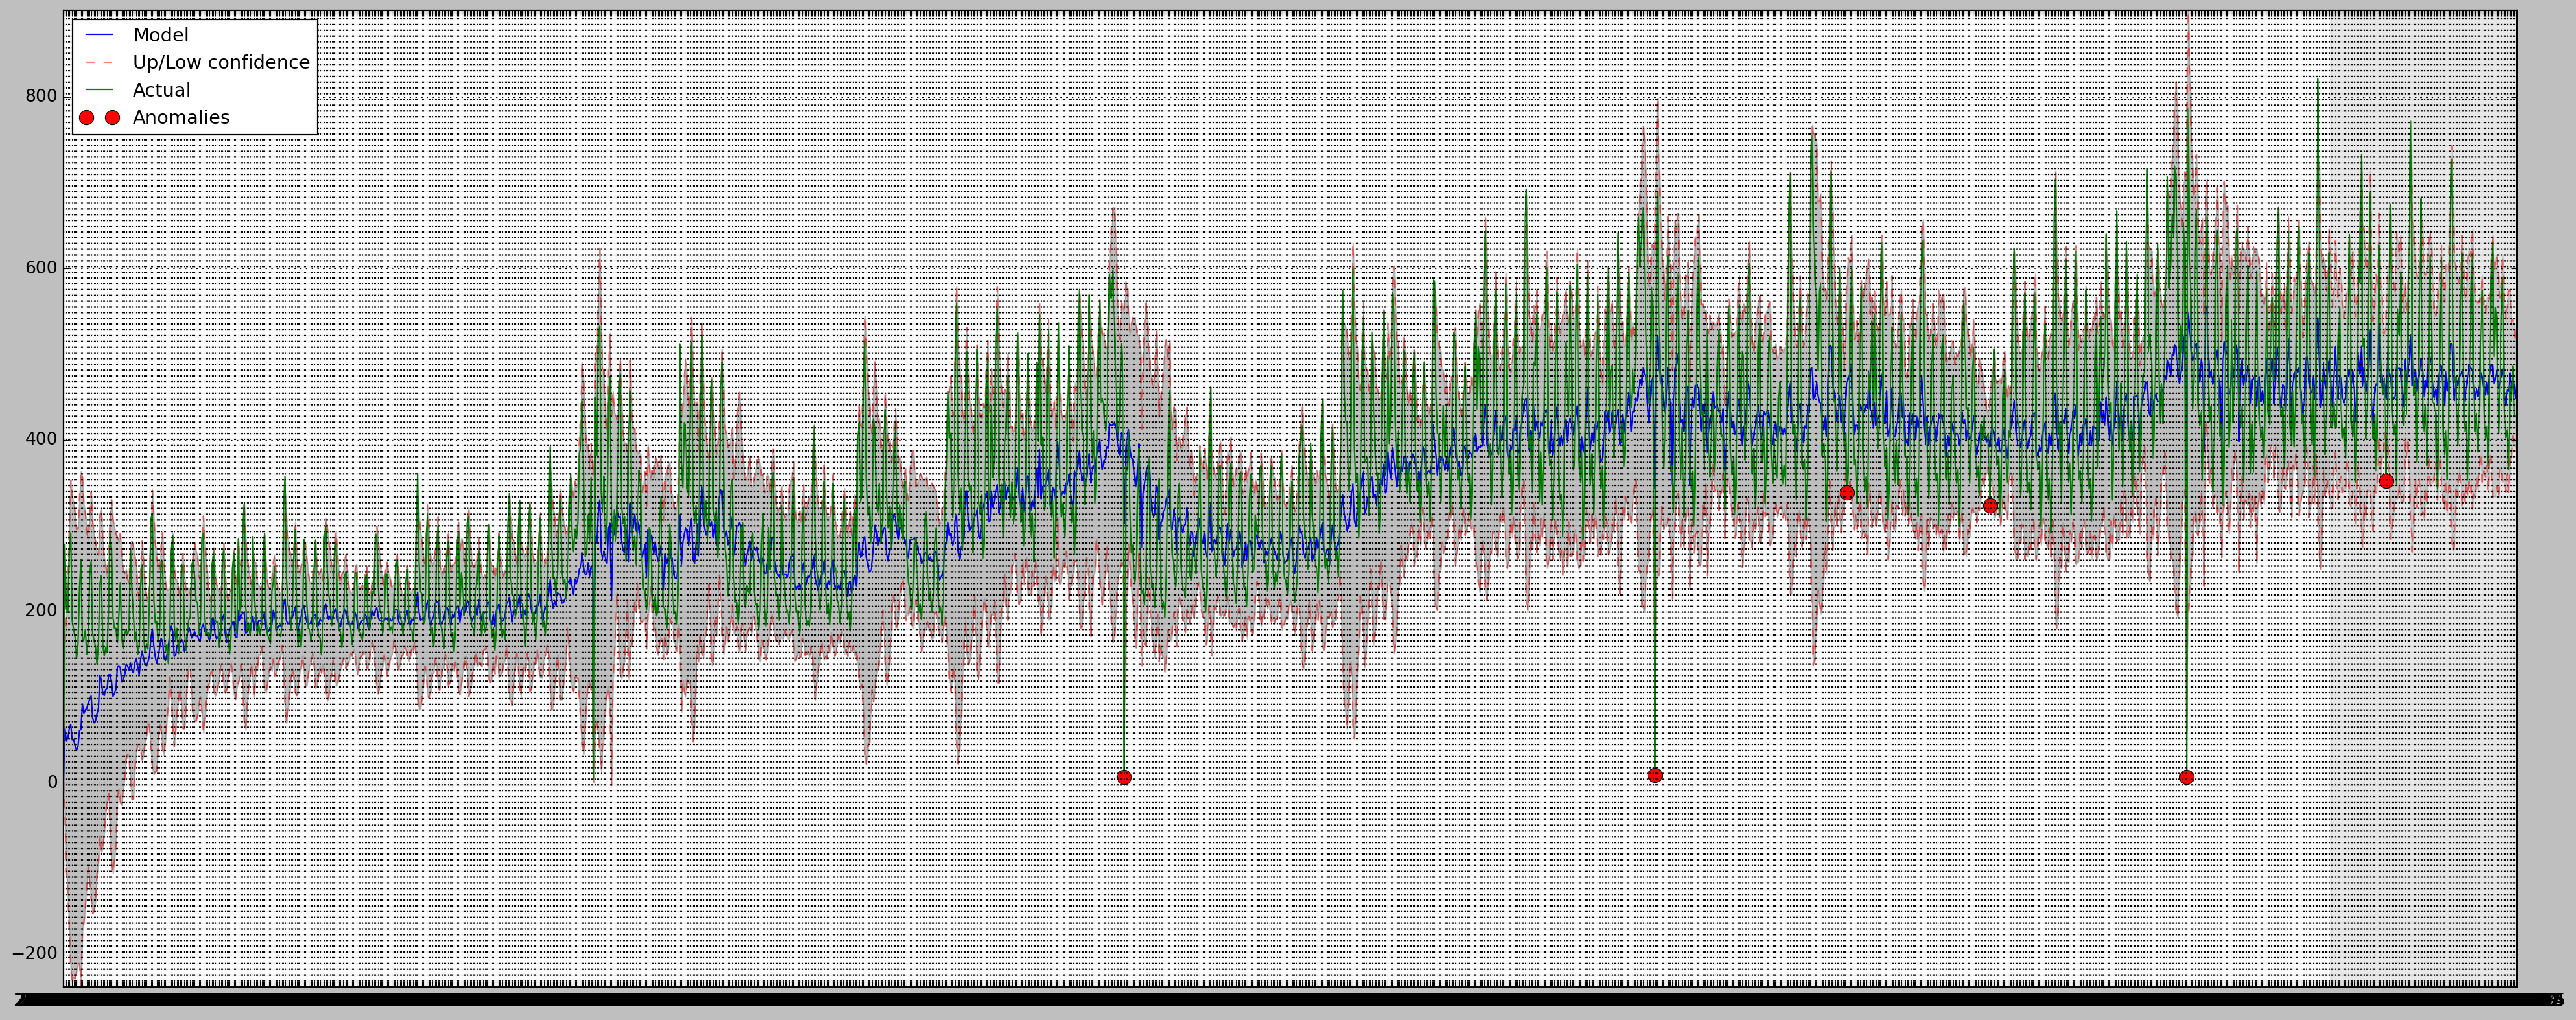

In [ ]:
def plotHoltWinters():
    Anomalies = np.array([np.nan]*len(average_sales))
    Anomalies[average_sales<model.LowerBond] = average_sales[average_sales<model.LowerBond]
    plt.figure(figsize=(25, 10))
    plt.plot(model.result, label = "Model")
    plt.plot(model.UpperBond, "r--", alpha=0.5, label = "Up/Low confidence")
    plt.plot(model.LowerBond, "r--", alpha=0.5)
    plt.fill_between(x=range(0,len(model.result)), y1=model.UpperBond, y2=model.LowerBond, alpha=0.5, color = "grey")
    plt.plot(av, label = "Actual")
    plt.plot(Anomalies, "o", markersize=10, label = "Anomalies")
    plt.axvspan(len(av)-128, len(av), alpha=0.5, color='lightgrey')
    plt.grid(True)
    plt.axis('tight')
    plt.legend(loc="best", fontsize=13);

plotHoltWinters()